# TP 1 - Mineração de Padrões nos Microdados do ENEM 2023

## 1. Business Understanding

### Objetivo do dataset

O Enem (Exame Nacional do Ensino Médio) é um dos principais instrumentos de avaliação educacional do Brasil e ingresso em universidades nacionais, com milhões de participantes todos os anos. Os **Microdados do ENEM** são datasets que têm por objetivo registrar informações sobre os participantes do Exame Nacional do Ensino Médio a cada edição, contendo dados sociodemográficos, escolares e de notas obtidas nas provas. Eles podem ser utilizados para resolver problemas relacionados à educação pública e privada no Brasil, como a identificação
de perfis de estudantes com diferentes níveis de desempenho, a avaliação da equidade no acesso ao ensino e o entendimento de padrões sociodemográficos associados ao sucesso nas provas.

Dado esse contexto, o projeto propõe a análise dos Microdados do ENEM 2023 por meio de mineração de itemsets frequentes e regras de associação. A mineração de padrões recorrentes entre características socioeconômicas, educacionais e de desempenho nas provas pode revelar perfis típicos, padrões comportamentais e possíveis desigualdades estruturais. Uma análise desse tipo pode ajudar a compreender melhor o contexto educacional dos participantes e orientar decisões estratégicas no setor.

### Características do dataset
Os dados são disponibilizados pelo INEP no endereço https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados , órgão vinculado ao Ministério da Educação (MEC). O INEP publica anualmente os microdados do ENEM, e as informações dos inscritos são anonimizadas. Cada linha do dataset representa um participante do ENEM 2023, cada um com um ID único e 75 características diferentes, separadas nas macrocategorias:

1. Dados do participante (escolaridade, faixa etária, raça etc.)
2. Dados da escola onde o participante estudou
3. Dados do local de aplicação de prova
4. Dados da prova objetiva (presença e notas)
5. Dados da redação (presença e notas)
6. Dados do questionário socioeconômico

Características técnicas:
- Número de linhas: 3.933.955
- Formato: .csv
- Tamanho: 1.7 GB

02 dicionários de dados (original e adaptado por nós) foram fornecidos e estão localizados na pasta `data/raw/dictionary/dicionario.csv`.

### Relação com o problema de negócio

A escolha deste dataset se justifica por sua riqueza informacional e abrangência nacional, permitindo extrair padrões que refletem a realidade educacional brasileira. Ao aplicar a
mineração de itemsets frequentes, será possível identificar perfis recorrentes de candidatos – por exemplo, "estudantes de escola pública urbana com faixa etária de 17 a 19 anos que
alcançam notas altas em Linguagens". Esses insights podem orientar políticas públicas educacionais, ações afirmativas, distribuição de recursos e estratégias pedagógicas voltadas à
melhoria da qualidade do ensino. 

Dessa forma, a análise busca responder à seguintes perguntas (problemas do negócio):
1. Quais combinações de características pessoais e escolares estão frequentemente associadas a determinados níveis de desempenho no ENEM?
2. Quais combinações de características pessoais e escolares estão frequentemente associadas a ausência completa ou parcial nos dias de prova?

## 2. Data Understanding 

Apenas as colunas mais relevantes para a pergunta de negócio foram escolhidas, são elas: 

 - ID da inscrição: ``NU_INSCRICAO``
 - Dados demográficos: ``TP_FAIXA_ETARIA``, ``TP_SEXO``, ``TP_ESTADO_CIVIL``, ``TP_COR_RACA``, ``TP_NACIONALIDADE`` 
 - Dados de conclusão do Ensino Médio: ``TP_ST_CONCLUSAO``, ``TP_ANO_CONCLUIU``, ``TP_ESCOLA``, ``TP_ENSINO``, ``IN_TREINEIRO``
 - Dados da escola em que fez o Ensino Médio: ``CO_MUNICIPIO_ESC``, ``TP_DEPENDENCIA_ADM_ESC``, ``TP_LOCALIZACAO_ESC``, ``TP_SIT_FUNC_ESC``
 - Dados do local de prova: ``CO_MUNICIPIO_PROVA`` 
 - Dados de presença: ``TP_PRESENCA_CN``, ``TP_PRESENCA_CH``, ``TP_PRESENCA_LC``, ``TP_PRESENCA_MT``
 - Dados do tipo de prova do candidato: ``CO_PROVA_CN``, ``CO_PROVA_CH``, ``CO_PROVA_LC``, ``CO_PROVA_MT``, ``TP_LINGUA``
 - Dados de nota das provas objetivas: ``NU_NOTA_CN``, ``NU_NOTA_CH``, ``NU_NOTA_LC``, ``NU_NOTA_MT``
 - Dados da nota na redação: ``TP_STATUS_REDACAO``, ``NU_NOTA_COMP1``, ``NU_NOTA_COMP2``, ``NU_NOTA_COMP3``, ``NU_NOTA_COMP4``, ``NU_NOTA_COMP5``, ``NU_NOTA_REDACAO``
 - Dados socioeconômicos: ``Q001`` (escolaridade do pai), ``Q002`` (escolaridade da mãe), ``Q006`` (renda), ``Q025`` (acesso à internet)

 A seguir é feita uma análise exploratória dos dados, separadamente entre variávei categóricas e variáveis numéricas

### Leitura eficiente do dataframe amostrado

Como o dataset completo tinha muitos registros, fizemos uma amostragem aleatória de 20% dos seus valores.
- **Dataset original:**  3.9 M  registros
- **Dataset amostrado:** 0.8 M registros 

O dataset amostrado pode ser encontrado em ``data/raw/microdados_enem_2023_sample.csv``

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

# Configurações
DATA_PATH = Path().resolve() / 'data'
ARQUIVO_AMOSTRA_PATH = DATA_PATH / 'raw' / 'microdados_enem_2023_sample.csv'

# Definição dos tipos
colunas_float = [
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
    'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
    'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'
]

colunas_string = [
    'NU_INSCRICAO', 'CO_MUNICIPIO_ESC', 'CO_MUNICIPIO_PROVA'
]

# Captura os nomes das colunas
colunas = pd.read_csv(ARQUIVO_AMOSTRA_PATH, nrows=0, encoding='latin1').columns.tolist()

# Preparar o dicionário de tipos
dtypes = {}
for col in colunas:
    if col in colunas_float:
        dtypes[col] = 'float32'
    elif col in colunas_string:
        dtypes[col] = 'string'
    else:
        dtypes[col] = 'category'

# Leitura com tipos otimizados
df = pd.read_csv(ARQUIVO_AMOSTRA_PATH, dtype=dtypes, encoding='latin1')

# Informações para conferência
print("="*40)
print(f"Memória usada: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")
print(f"Quantidade de colunas: {df.shape[1]}")
print(f"Quantidade de linhas: {df.shape[0]}")
print("="*40)

# Tipos de dados
print("\nTipos de dados por coluna:")
print(df.dtypes)

Memória usada: 193.93 MB
Quantidade de colunas: 40
Quantidade de linhas: 786791

Tipos de dados por coluna:
NU_INSCRICAO              string[python]
TP_FAIXA_ETARIA                 category
TP_SEXO                         category
TP_ESTADO_CIVIL                 category
TP_COR_RACA                     category
TP_NACIONALIDADE                category
TP_ST_CONCLUSAO                 category
TP_ANO_CONCLUIU                 category
TP_ESCOLA                       category
TP_ENSINO                       category
IN_TREINEIRO                    category
CO_MUNICIPIO_ESC          string[python]
TP_DEPENDENCIA_ADM_ESC          category
TP_LOCALIZACAO_ESC              category
TP_SIT_FUNC_ESC                 category
CO_MUNICIPIO_PROVA        string[python]
TP_PRESENCA_CN                  category
TP_PRESENCA_CH                  category
TP_PRESENCA_LC                  category
TP_PRESENCA_MT                  category
CO_PROVA_CN                     category
CO_PROVA_CH                    

### Variáveis categóricas

#### Análise de dados nulos

In [ ]:
# Checagem de valores nulos
print("\nValores nulos por coluna:")
nulos = df.isnull().sum()
percentual_nulos = (nulos / len(df)) * 100

# Criando um dataframe com os valores absolutos e percentuais
df_nulos = pd.DataFrame({
    'Valores Nulos': nulos,
    'Percentual Nulos (%)': percentual_nulos
})

# Exibindo o dataframe de nulos
print(df_nulos)


Valores nulos por coluna:
                        Valores Nulos  Percentual Nulos (%)
NU_INSCRICAO                        0              0.000000
TP_FAIXA_ETARIA                     0              0.000000
TP_SEXO                             0              0.000000
TP_ESTADO_CIVIL                     0              0.000000
TP_COR_RACA                         0              0.000000
TP_NACIONALIDADE                    0              0.000000
TP_ST_CONCLUSAO                     0              0.000000
TP_ANO_CONCLUIU                     0              0.000000
TP_ESCOLA                           0              0.000000
TP_ENSINO                      519042             65.969489
IN_TREINEIRO                        0              0.000000
CO_MUNICIPIO_ESC               594910             75.612202
TP_DEPENDENCIA_ADM_ESC         594910             75.612202
TP_LOCALIZACAO_ESC             594910             75.612202
TP_SIT_FUNC_ESC                594910             75.612202
CO_MUNICIPIO_

Dessa análise, já decidimos descartar os dados:
- ``CO_MUNICIPIO_ESC``                         
- ``TP_DEPENDENCIA_ADM_ESC``                   
- ``TP_LOCALIZACAO_ESC``                       
- ``TP_SIT_FUNC_ESC``
porque 75% dos seus valores são nulos                          

#### Dados demográficos

/tmp/ipykernel_552127/867491838.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')
/tmp/ipykernel_552127/867491838.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')
/tmp/ipykernel_552127/867491838.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')
/tmp/ipykernel_552127/867491838.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')


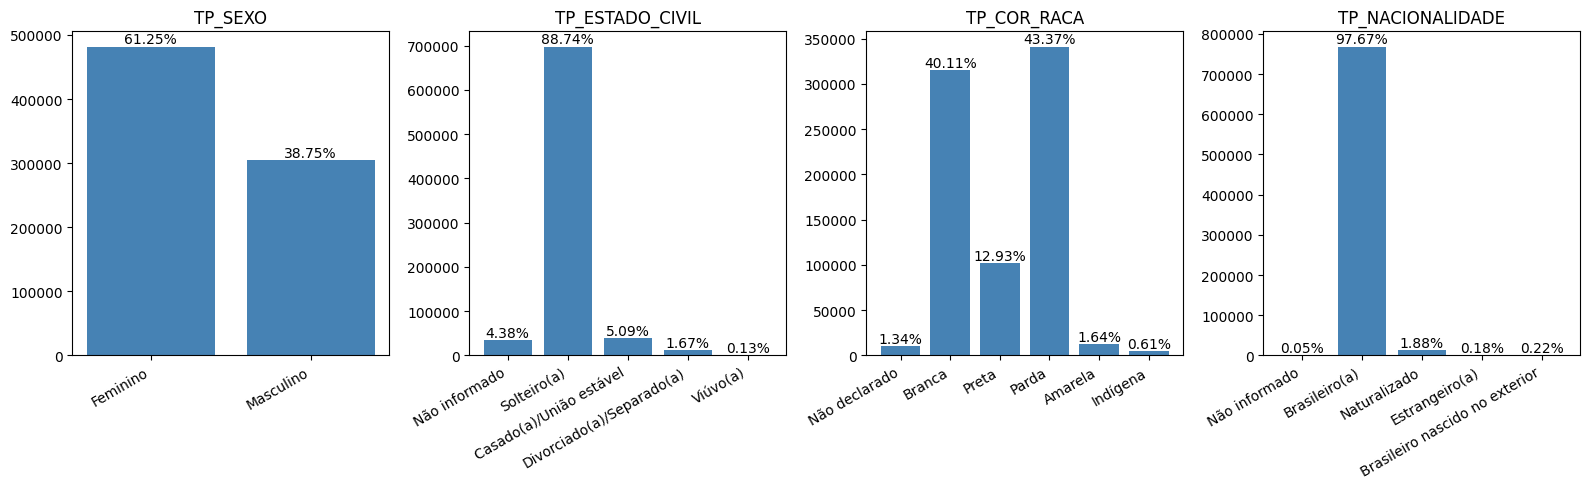

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionários com rótulos traduzidos
labels_dict = {
    'TP_SEXO': {'M': 'Masculino', 'F': 'Feminino'},
    'TP_ESTADO_CIVIL': {
        '0': 'Não informado',
        '1': 'Solteiro(a)',
        '2': 'Casado(a)/União estável',
        '3': 'Divorciado(a)/Separado(a)',
        '4': 'Viúvo(a)'
    },
    'TP_COR_RACA': {
        '0': 'Não declarado',
        '1': 'Branca',
        '2': 'Preta',
        '3': 'Parda',
        '4': 'Amarela',
        '5': 'Indígena',
        '6': 'Sem info'
    },
    'TP_NACIONALIDADE': {
        '0': 'Não informado',
        '1': 'Brasileiro(a)',
        '2': 'Naturalizado',
        '3': 'Estrangeiro(a)',
        '4': 'Brasileiro nascido no exterior'
    }
}

# Colunas a serem visualizadas
colunas_plot = ['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE']

# Criar subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for i, col in enumerate(colunas_plot):
    # Frequência absoluta
    freq_abs = df[col].value_counts().sort_index()
    # Frequência relativa em %
    freq_rel = (freq_abs / len(df)) * 100
    labels = [labels_dict[col].get(valor, str(valor)) for valor in freq_abs.index]

    axes[i].bar(labels, freq_abs.values, color='steelblue')
    axes[i].set_title(f'{col}')

    axes[i].set_xticklabels(labels, rotation=30, ha='right')
    
    # Adiciona os valores relativos em % em cima de cada barra
    for j, val in enumerate(freq_abs.values):
        axes[i].text(j, val + 50, f'{freq_rel.values[j]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Como a grande maioria dos candidatos é solteira e brasileira, os outros valores possíveis das categorias ``TP_ESTADO_CIVIL`` e ``TP_NACIONALIDADE`` serão dificilmente incorporados nos padrões frequentes. Logo, decidimos não manter essas variáveis também.

#### Dados de faixa etária

/tmp/ipykernel_552127/2791099873.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


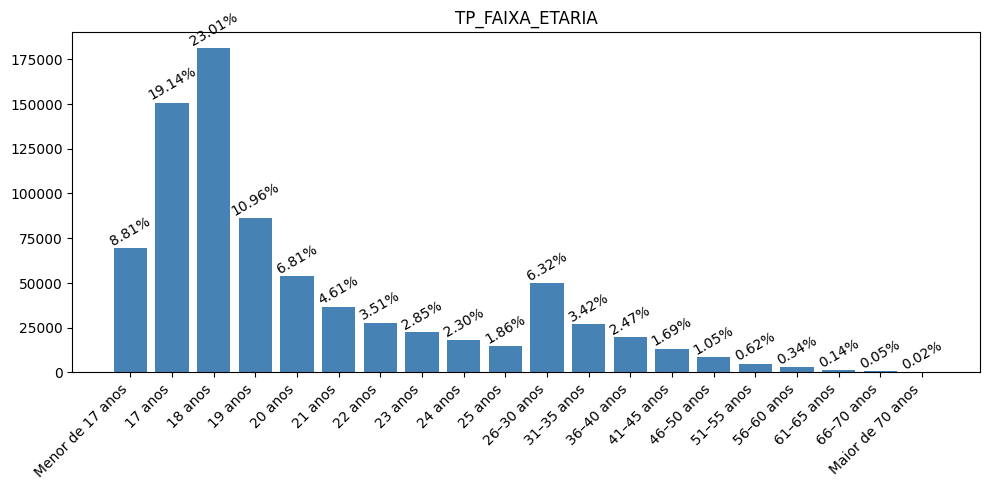

In [ ]:
import pandas as plt
import matplotlib.pyplot as plt

# Dicionários com rótulos traduzidos
labels_dict = {'TP_FAIXA_ETARIA' : {
    '1': "Menor de 17 anos",
    '2': "17 anos",
    '3': "18 anos",
    '4': "19 anos",
    '5': "20 anos",
    '6': "21 anos",
    '7': "22 anos",
    '8': "23 anos",
    '9': "24 anos",
    '10': "25 anos",
    '11': "26–30 anos",
    '12': "31–35 anos",
    '13': "36–40 anos",
    '14': "41–45 anos",
    '15': "46–50 anos",
    '16': "51–55 anos",
    '17': "56–60 anos",
    '18': "61–65 anos",
    '19': "66–70 anos",
    '20': "Maior de 70 anos"
    }
}

# Colunas a serem visualizadas
colunas_plot = ['TP_FAIXA_ETARIA']
col = 'TP_FAIXA_ETARIA'

# Criar subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Frequência absoluta
freq_abs = df[col].value_counts(dropna=False).sort_index(key=lambda x: x.astype(float))
# Frequência relativa em %
freq_rel = (freq_abs / len(df)) * 100

labels = [labels_dict[col].get(valor, str(valor)) for valor in freq_abs.index]

ax.bar(labels, freq_abs.values, color='steelblue')
ax.set_title(f'{col}')

ax.set_xticklabels(labels, rotation=45, ha='right')

# Adiciona os valores relativos em % em cima de cada barra
for j, val in enumerate(freq_abs.values):
    ax.text(j, val + 50, f'{freq_rel.values[j]:.2f}%', ha='center', va='bottom', fontsize=10, color='black', rotation=30)

plt.tight_layout()
plt.show()

Decidimos não utilizar os dados de "Faixa etária" porque nos dão uma informação muito parecida com aquela dos "Dados de conclusão do Ensino Médio". Como será mostrado a seguir, esses dados podem ser mais precisos ao nos dizer sobre a "experiência escolar" do candidato no contexto da realização da prova do ENEM.

#### Dados de conclusão do Ensino Médio

In [ ]:
print("\nAno em que concluiu:")

tp_escola = df['TP_ANO_CONCLUIU'].value_counts(dropna=False).sort_index(key=lambda x: x.astype(int))
tp_escola_pct = df['TP_ANO_CONCLUIU'].value_counts(normalize=True, dropna=False).sort_index(key=lambda x: x.astype(int)) * 100

resultado = pd.DataFrame({
    'Frequência': tp_escola[tp_escola.index],
    'Percentual (%)': tp_escola_pct[tp_escola_pct.index].round(2)
})

print(resultado)

print("\nSituação de conclusão:")

st_conclusao = df['TP_ST_CONCLUSAO'].value_counts(dropna=False).sort_index(key=lambda x: x.astype(int))
st_conclusao_pct = df['TP_ST_CONCLUSAO'].value_counts(normalize=True, dropna=False).sort_index(key=lambda x: x.astype(int)) * 100

resultado = pd.DataFrame({
    'Frequência': st_conclusao,
    'Percentual (%)': st_conclusao_pct.round(2)
})

print(resultado)



Ano em que concluiu:
                 Frequência  Percentual (%)
TP_ANO_CONCLUIU                            
0                    448386           56.99
1                     83779           10.65
2                     52843            6.72
3                     29923            3.80
4                     26964            3.43
5                     20932            2.66
6                     17226            2.19
7                     13114            1.67
8                     11043            1.40
9                      9319            1.18
10                     8082            1.03
11                     7119            0.90
12                     5774            0.73
13                     5540            0.70
14                     4823            0.61
15                     4222            0.54
16                     4142            0.53
17                    33560            4.27

Situação de conclusão:
                 Frequência  Percentual (%)
TP_ST_CONCLUSAO               

Observando os resultados abaixo, percebemos que todos os candidatos que marcaram "Não informado" na variável ``TP_ANO_CONCLUIU`` podem ser incluídos em uma das categorias de ``TP_ST_CONCLUSAO``. Então, decidimos unir essas duas variaveis na variável ``TP_CONCLUSAO``.

In [ ]:
print("\nDos que já concluíram, foi em qual ano:")
df[df['TP_ST_CONCLUSAO'] == '1'].TP_ANO_CONCLUIU.value_counts(dropna=False).sort_index(key=lambda x: x.astype(int))


Dos que já concluíram, foi em qual ano:


TP_ANO_CONCLUIU
0     41022
1     83779
2     52843
3     29923
4     26964
5     20932
6     17226
7     13114
8     11043
9      9319
10     8082
11     7119
12     5774
13     5540
14     4823
15     4222
16     4142
17    33560
Name: count, dtype: int64

Ainda, como a quantidade de candidatos que já concluíram o Ensino Médio decresce à medida que se afastam do ano de 2023, decidimos aglutinar algumas dessas categorias.

In [ ]:
print("\nAno em que concluiu:")

tp_escola = df['TP_ANO_CONCLUIU'].value_counts(dropna=False).sort_index(key=lambda x: x.astype(int))
tp_escola_pct = df['TP_ANO_CONCLUIU'].value_counts(normalize=True, dropna=False).sort_index(key=lambda x: x.astype(int)) * 100

resultado = pd.DataFrame({
    'Frequência': tp_escola,
    'Percentual (%)': tp_escola_pct.round(2)
})

print(resultado)


Ano em que concluiu:
                 Frequência  Percentual (%)
TP_ANO_CONCLUIU                            
0                    448386           56.99
1                     83779           10.65
2                     52843            6.72
3                     29923            3.80
4                     26964            3.43
5                     20932            2.66
6                     17226            2.19
7                     13114            1.67
8                     11043            1.40
9                      9319            1.18
10                     8082            1.03
11                     7119            0.90
12                     5774            0.73
13                     5540            0.70
14                     4823            0.61
15                     4222            0.54
16                     4142            0.53
17                    33560            4.27


Por fim, para gerar categorias significativas e balanceadas em quantidade de dados, foi gerada uma nova variável ``TP_CONCLUSAO`` que une as informações das duas variáveis anteriores
- 1: EM concluído, independente do ano
- 2: EM em curso
- 3: EM não cursado

#### Dados da escola do Ensino Médio

In [ ]:
df['TP_ENSINO'].value_counts(dropna=False)

TP_ENSINO
NaN    519042
1.0    266392
2.0      1357
Name: count, dtype: int64

/tmp/ipykernel_552127/2244834495.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')
/tmp/ipykernel_552127/2244834495.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')
/tmp/ipykernel_552127/2244834495.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')


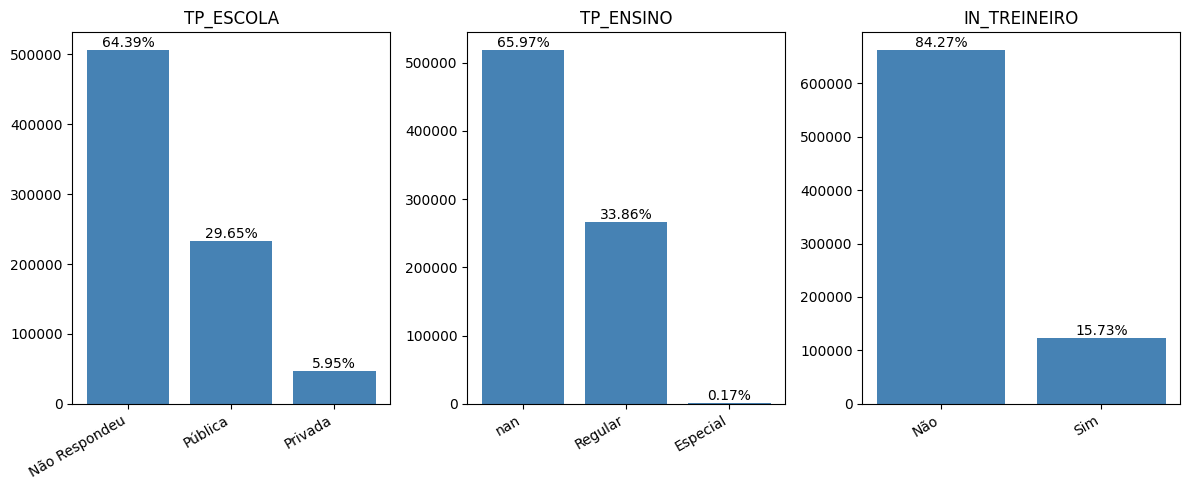

In [ ]:
import pandas as plt
import matplotlib.pyplot as plt

# Dicionários com rótulos traduzidos
labels_dict = {
    'TP_ESCOLA': {'1': 'Não Respondeu', '2': 'Pública', '3': 'Privada'},
    'IN_TREINEIRO': {'1': 'Sim', '0': 'Não'},
    'TP_ENSINO':{'1.0': 'Regular', '2.0': 'Especial'} 
}

# Colunas a serem visualizadas
colunas_plot = ['TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO']

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, col in enumerate(colunas_plot):
    # Frequência absoluta
    freq_abs = df[col].value_counts(dropna=False).sort_index()
    # Frequência relativa em %
    freq_rel = (freq_abs / len(df)) * 100
    labels = [labels_dict[col].get(valor, str(valor)) for valor in freq_abs.index]

    axes[i].bar(labels, freq_abs.values, color='steelblue')
    axes[i].set_title(f'{col}')

    axes[i].set_xticklabels(labels, rotation=30, ha='right')
    
    # Adiciona os valores relativos em % em cima de cada barra
    for j, val in enumerate(freq_abs.values):
        axes[i].text(j, val + 50, f'{freq_rel.values[j]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

A partir dos dados da escola em que o candidato cursou o Ensino Médio, podemos perceber que a maior parte dos dados é inexistente. Todavia, manteremos essas variáveis na modelagem pois pode ser possível encontrar padrões interessantes para os usuários que não responderam. 

Como há uma quantidade muito pequena de dados com ``TP_ENSINO`` da categoria 'Especial', vamos descartar essa variável.

#### Dados do município de aplicação

Os dados da escola onde o candidato tem muitos valores nulos como pode ser visto na seção "Dados nulos (geral)", por isso não serão usados na modelagem.

Uma proxy para localizaão será a região onde o candidato realizou a prova, que pode ser extraída da variável ``CO_MUNICIPIO_PROVA``.

In [ ]:
df['CO_MUNICIPIO_PROVA'].head(5)

Sabemos que o primeiro dígito corresponde à região, mas não sabemos qual é qual. Para isso investigaremos uma parte do arquivo original pra descobrir qual dígito corresponde a qual região do Brasil.

In [ ]:
# Para rodar essa parte é necessário ter o dataset completo, que omitimos por ser muito grande
# DATA_PATH = Path().resolve() / 'data'
# ARQUIVO_ORIGEM_PATH = DATA_PATH / 'raw' / 'microdados_enem_2023.csv'
# regiao = pd.read_csv(ARQUIVO_ORIGEM_PATH, encoding='latin1', nrows=1000, usecols=['CO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA'],
#                      delimiter=';')
# regiao.groupby(by='CO_UF_PROVA').first()


,CO_MUNICIPIO_PROVA,SG_UF_PROVA
CO_UF_PROVA,,
11,1100304,RO
12,1200401,AC
13,1302603,AM
14,1400100,RR
15,1501402,PA
16,1600303,AP
17,1702109,TO
21,2109452,MA
22,2211001,PI


Portanto, nosso mapeamento é:
- 1: Norte
- 2: Nordeste
- 3: Sudeste
- 4: Sul
- 5: Centro-Oeste

Portanto, temos dados para todas as regiões do Brasil, e da pra ver que a maior parte dos candidatos é do Nordeste, seguidos pelo Sudeste.

#### Dados de presença nas provas objetivas

A presença nas provas pode ser resumida a:
- Presença no primeiro dia: CH e LC
- Presença no segundo dia: CN e MT

Para mostrar que as variáveis ``TP_PRESENCA_CH`` e ``TP_PRESENCA_LC`` são correspondentes, e ``TP_PRESENCA_CN`` e ``TP_PRESENCA_MT`` também, plotamos uma matriz de coocorrência

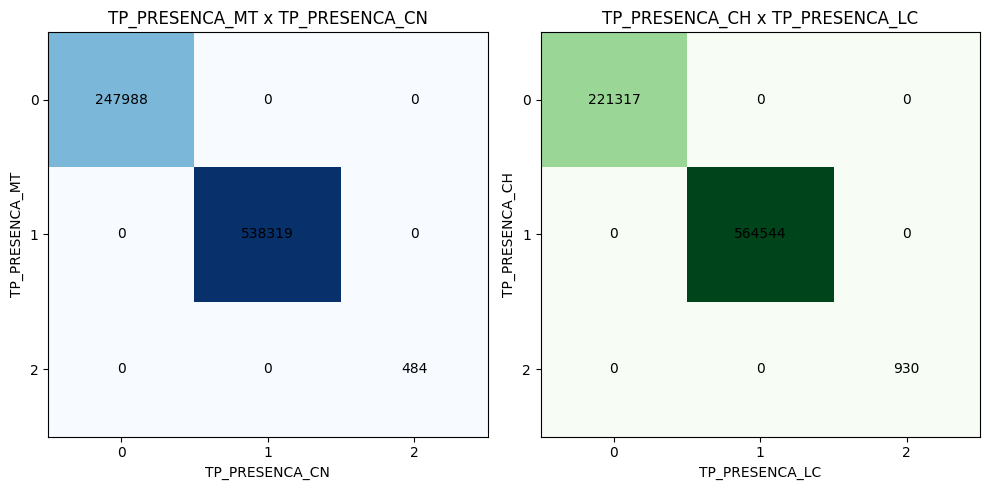

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tabelas de coocorrência
cont_mt_cn = pd.crosstab(df['TP_PRESENCA_MT'], df['TP_PRESENCA_CN'])
cont_ch_lc = pd.crosstab(df['TP_PRESENCA_CH'], df['TP_PRESENCA_LC'])

# Criar a figura com subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 5x10 total (altura x largura)

# Heatmap 1: MT vs CN
axes[0].imshow(cont_mt_cn, cmap='Blues', aspect='auto')
axes[0].set_title('TP_PRESENCA_MT x TP_PRESENCA_CN')
axes[0].set_xlabel('TP_PRESENCA_CN')
axes[0].set_ylabel('TP_PRESENCA_MT')
axes[0].set_xticks(range(len(cont_mt_cn.columns)))
axes[0].set_xticklabels(cont_mt_cn.columns)
axes[0].set_yticks(range(len(cont_mt_cn.index)))
axes[0].set_yticklabels(cont_mt_cn.index)

# Adiciona valores no heatmap 1
for i in range(cont_mt_cn.shape[0]):
    for j in range(cont_mt_cn.shape[1]):
        axes[0].text(j, i, cont_mt_cn.values[i, j], ha='center', va='center', color='black')

# Heatmap 2: CH vs LC
axes[1].imshow(cont_ch_lc, cmap='Greens', aspect='auto')
axes[1].set_title('TP_PRESENCA_CH x TP_PRESENCA_LC')
axes[1].set_xlabel('TP_PRESENCA_LC')
axes[1].set_ylabel('TP_PRESENCA_CH')
axes[1].set_xticks(range(len(cont_ch_lc.columns)))
axes[1].set_xticklabels(cont_ch_lc.columns)
axes[1].set_yticks(range(len(cont_ch_lc.index)))
axes[1].set_yticklabels(cont_ch_lc.index)

# Adiciona valores no heatmap 2
for i in range(cont_ch_lc.shape[0]):
    for j in range(cont_ch_lc.shape[1]):
        axes[1].text(j, i, cont_ch_lc.values[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


#### Dados do tipo de língua e do status da redação

Apenas para entender a quantidade de pessoas que escolheu inglês ou espanhol, e também quantas pessoas tiveram alguma intercorrência na redação.

/tmp/ipykernel_552127/3942592330.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')
/tmp/ipykernel_552127/3942592330.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')


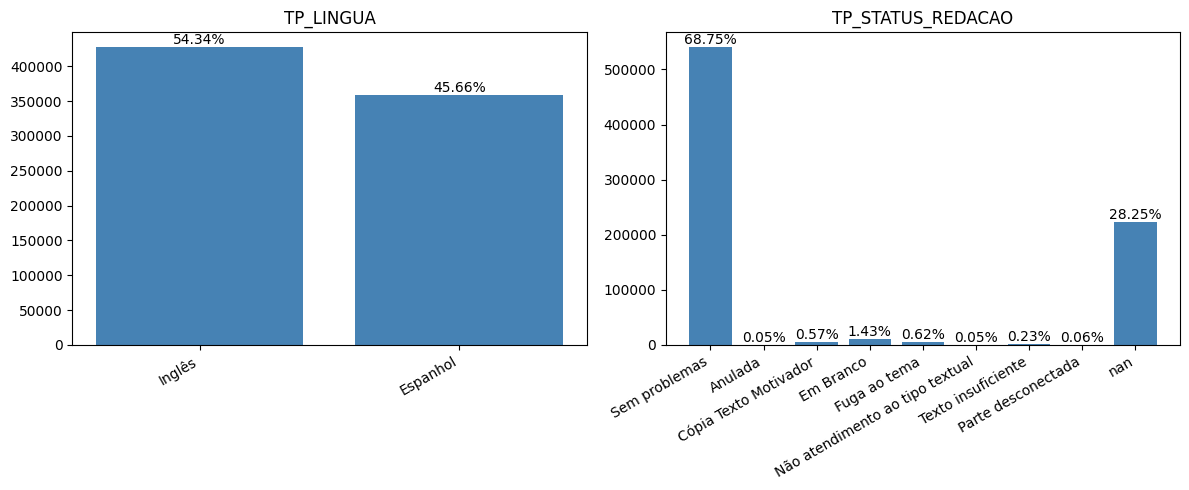

In [ ]:
import pandas as plt
import matplotlib.pyplot as plt

# Dicionários com rótulos traduzidos
labels_dict = {
    'TP_LINGUA': {'0': 'Inglês', '1': 'Espanhol'},
    'TP_STATUS_REDACAO': {'1.0': 'Sem problemas',
        '2.0': 'Anulada',
        '3.0': 'Cópia Texto Motivador',
        '4.0': 'Em Branco',
        '6.0': 'Fuga ao tema',
        '7.0': 'Não atendimento ao tipo textual',
        '8.0': 'Texto insuficiente',
        '9.0': 'Parte desconectada' 
    }
}

# Colunas a serem visualizadas
colunas_plot = ['TP_LINGUA', 'TP_STATUS_REDACAO']

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(colunas_plot):
    # Frequência absoluta
    freq_abs = df[col].value_counts(dropna=False).sort_index()
    # Frequência relativa em %
    freq_rel = (freq_abs / len(df)) * 100
    labels = [labels_dict[col].get(valor, str(valor)) for valor in freq_abs.index]

    axes[i].bar(labels, freq_abs.values, color='steelblue')
    axes[i].set_title(f'{col}')

    axes[i].set_xticklabels(labels, rotation=30, ha='right')
    
    # Adiciona os valores relativos em % em cima de cada barra
    for j, val in enumerate(freq_abs.values):
        axes[i].text(j, val + 50, f'{freq_rel.values[j]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Ainda, a quantidade de redações com tipo ``nan`` é igual à quantidade de ausências + eliminados do dia 1. Ou seja, os valores nulos em ``TP_STATUS_REDACAO`` correspondem aos candidatos ausentes ou eliminados da redação.

In [ ]:
ausencias_dia1 = df['TP_PRESENCA_CH'][df['TP_PRESENCA_CH'] != '1'].count()
redacoes_nulas = df['TP_STATUS_REDACAO'].isna().sum()

print(f'Ausentes e eliminados do dia 1: {ausencias_dia1}')
print(f'Valores Nan em TIPO_STATUS_REDACAO: {redacoes_nulas}')

Ausentes e eliminados do dia 1: 222247
Valores Nan em TIPO_STATUS_REDACAO: 222247


Todavia, como a informação de ausência da redação é a mesma da ausência nas provas de CH e LC, e ao desconsiderar esse valor redações "Sem problemas" são a grande maioria, optamos por descartar a categoria ``TP_STATUS_REDACAO``. 

#### Dados dos tipos de prova

Da cor do caderno de provas, pode-se inferir se a prova tem alguma adaptação. 
- Sabemos, a priori, que os cadernos de CN e MT são iguais, bem como os cadernos de CH e LC, por isso não plotaremos todos.
- Sabemos, também, que valores nulos nos códigos de caderno correspondem a candidatos ausentes naquele dia.

/tmp/ipykernel_552127/2797308854.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')
/tmp/ipykernel_552127/2797308854.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')


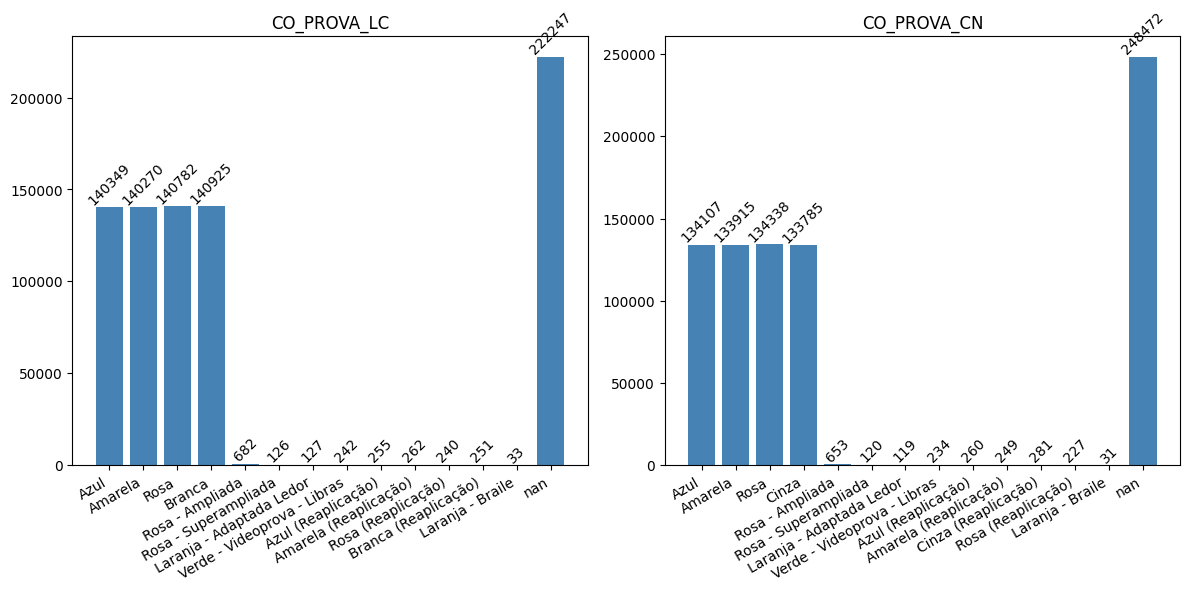

In [ ]:
import pandas as plt
import matplotlib.pyplot as plt

# Dicionários com rótulos traduzidos
labels_dict = {
    'CO_PROVA_LC' : {
        '1201.0': "Azul",
        '1202.0': "Amarela",
        '1203.0': "Rosa",
        '1204.0': "Branca",
        '1205.0': "Rosa - Ampliada",
        '1206.0': "Rosa - Superampliada",
        '1207.0': "Laranja - Braile",
        '1208.0': "Laranja - Adaptada Ledor",
        '1209.0': "Verde - Videoprova - Libras",
        '1281.0': "Azul (Reaplicação)",
        '1282.0': "Amarela (Reaplicação)",
        '1283.0': "Rosa (Reaplicação)",
        '1284.0': "Branca (Reaplicação)"
    },
    'CO_PROVA_CN': {
        '1221.0': "Azul",
        '1222.0': "Amarela",
        '1223.0': "Rosa",
        '1224.0': "Cinza",
        '1225.0': "Rosa - Ampliada",
        '1226.0': "Rosa - Superampliada",
        '1227.0': "Laranja - Braile",
        '1228.0': "Laranja - Adaptada Ledor",
        '1229.0': "Verde - Videoprova - Libras",
        '1301.0': "Azul (Reaplicação)",
        '1302.0': "Amarela (Reaplicação)",
        '1303.0': "Cinza (Reaplicação)",
        '1304.0': "Rosa (Reaplicação)"
    }
}

# Colunas a serem visualizadas
colunas_plot = ['CO_PROVA_LC', 'CO_PROVA_CN']

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(colunas_plot):
    # Frequência absoluta
    freq_abs = df[col].value_counts(dropna=False).sort_index()
    # Frequência relativa em %
    # freq_rel = (freq_abs / len(df)) * 100
    labels = [labels_dict[col].get(valor, str(valor)) for valor in freq_abs.index]

    axes[i].bar(labels, freq_abs.values, color='steelblue')
    axes[i].set_title(f'{col}')

    axes[i].set_xticklabels(labels, rotation=30, ha='right')
    
    # Adiciona os valores relativos em % em cima de cada barra
    for j, val in enumerate(freq_abs.values):
        axes[i].text(j, val + 50, f'{freq_abs.values[j]}', ha='center', va='bottom', fontsize=10, color='black', rotation=45)

plt.tight_layout()
plt.show()

Optamos também por desconsiderar essa categoria, pois a grande maioria das provas é sem adaptações.

#### Dados socioeconômicos

Primeiro os dados de escolaridade da mãe e do pai.

/tmp/ipykernel_552127/2587271874.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')
/tmp/ipykernel_552127/2587271874.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=30, ha='right')


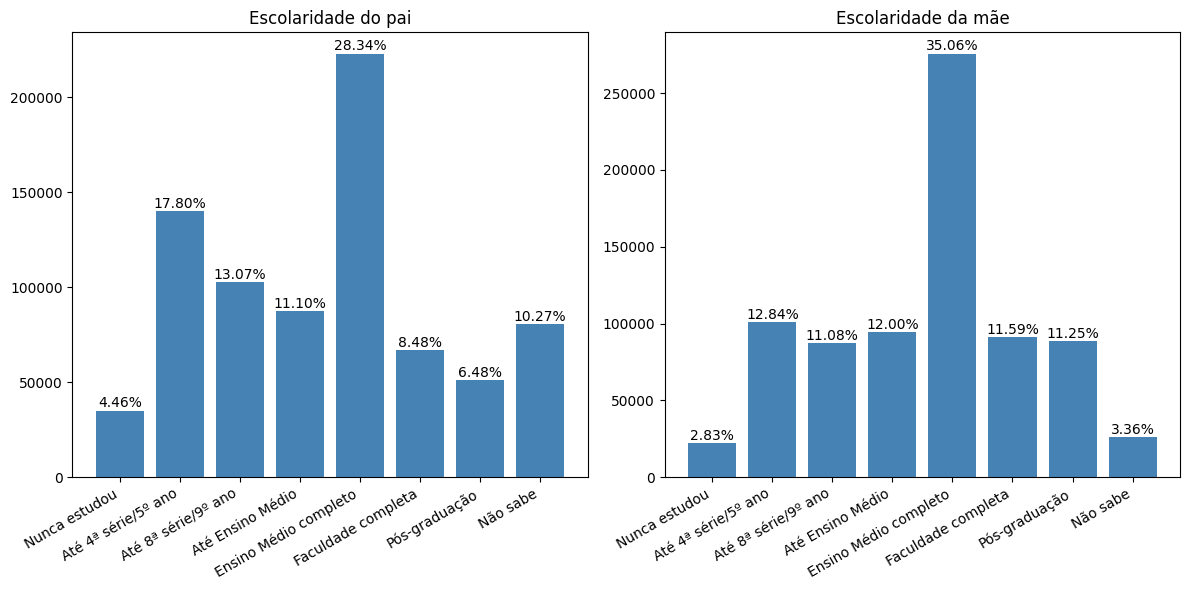

In [ ]:
import pandas as plt
import matplotlib.pyplot as plt

# Dicionários com rótulos traduzidos
labels_dict = {
    'Q001': {
        "Title": 'Escolaridade do pai', 
        "A": "Nunca estudou",
        "B": "Até 4ª série/5º ano",
        "C": "Até 8ª série/9º ano",
        "D": "Até Ensino Médio",
        "E": "Ensino Médio completo",
        "F": "Faculdade completa",
        "G": "Pós-graduação",
        "H": "Não sabe"
    },

    'Q002': {    
        "Title": 'Escolaridade da mãe', 
        "A": "Nunca estudou",
        "B": "Até 4ª série/5º ano",
        "C": "Até 8ª série/9º ano",
        "D": "Até Ensino Médio",
        "E": "Ensino Médio completo",
        "F": "Faculdade completa",
        "G": "Pós-graduação",
        "H": "Não sabe"
    }
}


# Colunas a serem visualizadas
colunas_plot = ['Q001', 'Q002']

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(colunas_plot):
    # Frequência absoluta
    freq_abs = df[col].value_counts(dropna=False).sort_index()
    # Frequência relativa em %
    # freq_rel = (freq_abs / len(df)) * 100
    labels = [labels_dict[col].get(valor, str(valor)) for valor in freq_abs.index]

    axes[i].bar(labels, freq_abs.values, color='steelblue')
    axes[i].set_title(f"{labels_dict[col]['Title']}")

    axes[i].set_xticklabels(labels, rotation=30, ha='right')

    # Adiciona os valores relativos em % em cima de cada barra
    freq_rel = (freq_abs / len(df)) * 100
    for j, val in enumerate(freq_abs.values):
        axes[i].text(j, val + 50, f'{freq_rel.values[j]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

As variáveis de escolaridade dos pais foram aglutinadas nos valores:
- 1: Nunca estudou
- 2: Não completou EM
- 3: Completou EM
- 4: Não sei

Agora dados de renda familiar e internet.

/tmp/ipykernel_552127/2196187273.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=45, ha='right')
/tmp/ipykernel_552127/2196187273.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels, rotation=45, ha='right')


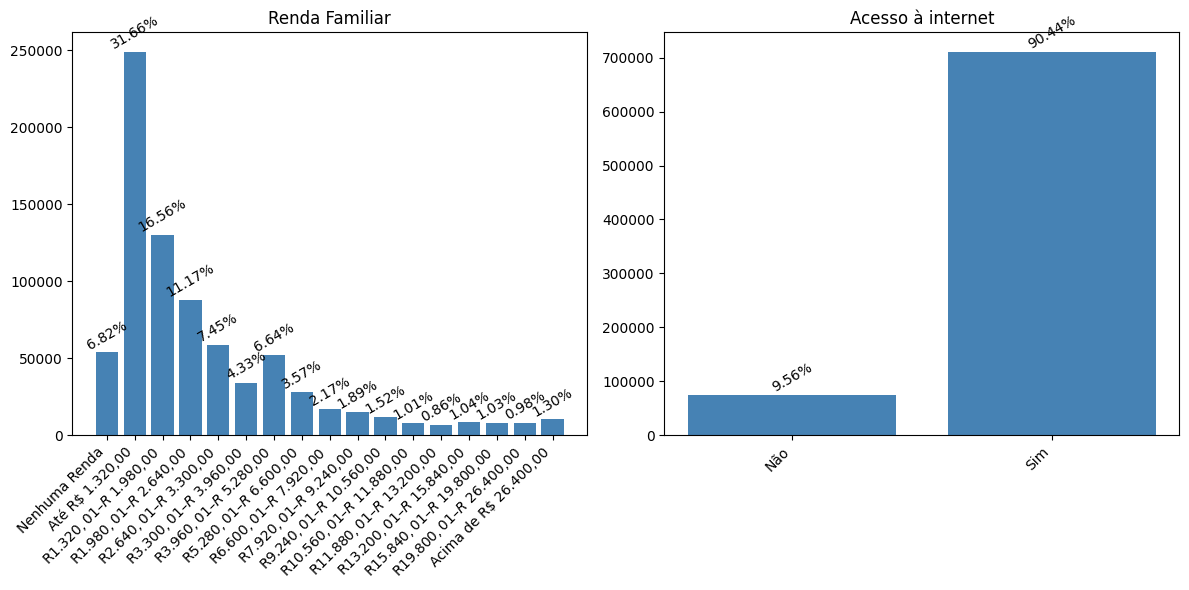

In [ ]:
import pandas as plt
import matplotlib.pyplot as plt

# Dicionários com rótulos traduzidos
labels_dict = {
    'Q006': {
        "Title": 'Renda Familiar',
        "A": "Nenhuma Renda",
        "B": "Até R$ 1.320,00",
        "C": "R$ 1.320,01 – R$ 1.980,00",
        "D": "R$ 1.980,01 – R$ 2.640,00",
        "E": "R$ 2.640,01 – R$ 3.300,00",
        "F": "R$ 3.300,01 – R$ 3.960,00",
        "G": "R$ 3.960,01 – R$ 5.280,00",
        "H": "R$ 5.280,01 – R$ 6.600,00",
        "I": "R$ 6.600,01 – R$ 7.920,00",
        "J": "R$ 7.920,01 – R$ 9.240,00",
        "K": "R$ 9.240,01 – R$ 10.560,00",
        "L": "R$ 10.560,01 – R$ 11.880,00",
        "M": "R$ 11.880,01 – R$ 13.200,00",
        "N": "R$ 13.200,01 – R$ 15.840,00",
        "O": "R$ 15.840,01 – R$ 19.800,00",
        "P": "R$ 19.800,01 – R$ 26.400,00",
        "Q": "Acima de R$ 26.400,00"
    },
    'Q025': {    
        "Title": 'Acesso à internet', 
        "A": "Não",
        "B": "Sim"
    }
}


# Colunas a serem visualizadas
colunas_plot = ['Q006', 'Q025']

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(colunas_plot):
    # Frequência absoluta
    freq_abs = df[col].value_counts(dropna=False).sort_index()
    # Frequência relativa em %
    # freq_rel = (freq_abs / len(df)) * 100
    labels = [labels_dict[col].get(valor, str(valor)) for valor in freq_abs.index]

    axes[i].bar(labels, freq_abs.values, color='steelblue')
    axes[i].set_title(f"{labels_dict[col]['Title']}")

    axes[i].set_xticklabels(labels, rotation=45, ha='right')

    # Adiciona os valores relativos em % em cima de cada barra
    freq_rel = (freq_abs / len(df)) * 100
    for j, val in enumerate(freq_abs.values):
        axes[i].text(j, val + 50, f'{freq_rel.values[j]:.2f}%', ha='center', va='bottom', fontsize=10, color='black', rotation=30)

plt.tight_layout()
plt.show()

Para diminuir a quantidade de categorias e fazê-las serem siginificativas em quantidade e balanceamento de dados, vamos aglutinar alguns valores possíveis de variáveis de renda.

- 1: Nenhuma Renda
- 2: Até 1.5 Salários Mínimos 
- 3: Mais que 1.5 Salários Mínimos

### Variáveis Numéricas

#### Dados Notas das Provas por Área de Conhecimento

Abaixo, segue a análise descritiva da distribuição das notas por área de conhecimento. Foram plotados 5 histogramas, um para cada área de conhecimento. Como o histograma da redação tinha uma distribuição diferente das demais, com valores de notas mais descontinuados e frequências para determinados valores de notas acima dos valores de notas das outras áreas de conhecimento. Por esses motivos, foi decidido plotar as notas de redação separadamente das demais notas.

Percebe-se que a mediana está muito próxima da média das notas para todos os histogramas, sugerindo uma distribuição simétrica. Destaca-se a presença de notas zeradas em todas as áreas do conhecimento. Esse comportamento é curioso e será objeto de investigação.

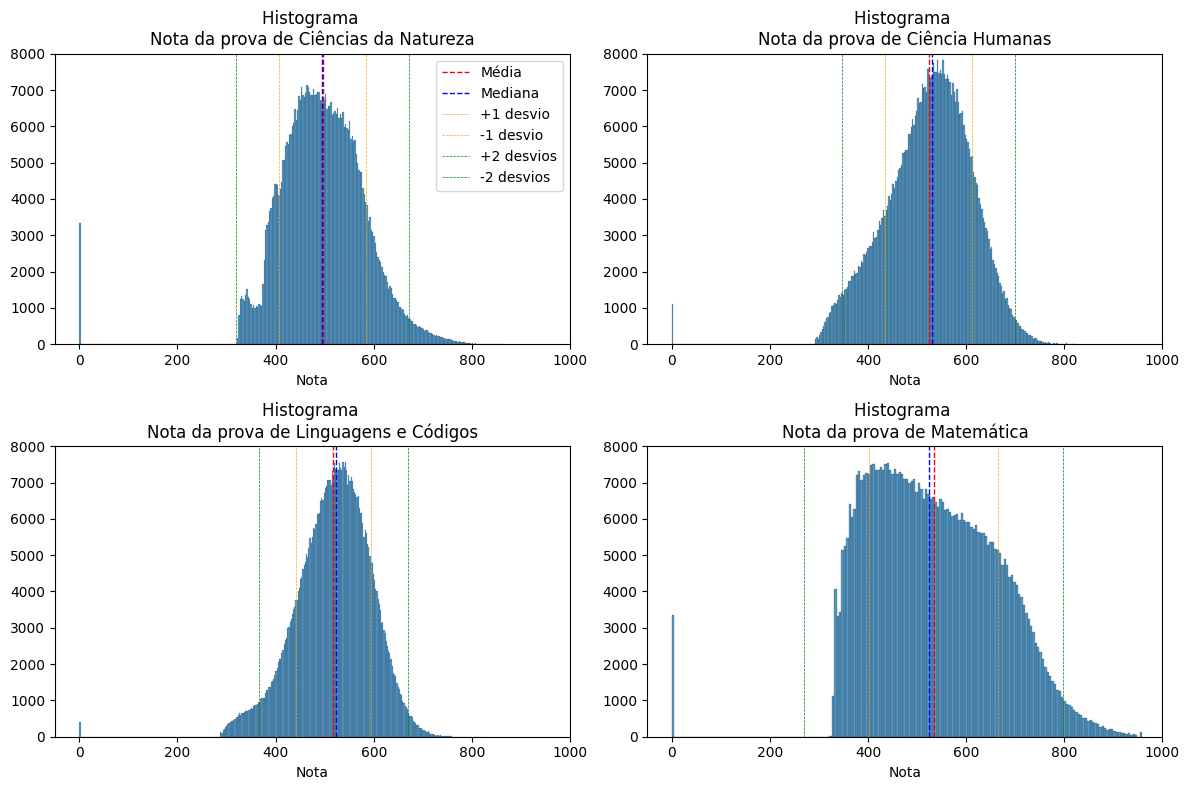

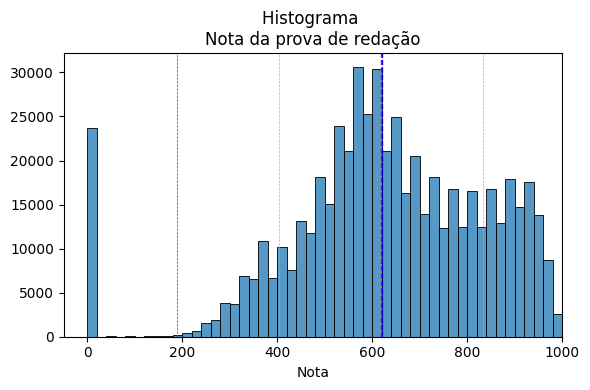

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
titulos = ['Nota da prova de Ciências da Natureza',
           'Nota da prova de Ciência Humanas',
           'Nota da prova de Linguagens e Códigos',
           'Nota da prova de Matemática']

for ax, col, tit in zip(axes.flatten(), colunas, titulos):
    sns.histplot(df[col], bins='auto', ax=ax)

    media = df[col].mean()
    std = df[col].std()
    mediana = df[col].median()

    ax.axvline(media, color='red', linestyle='--', linewidth=1.0, label='Média')
    ax.axvline(mediana, color='blue', linestyle='--', linewidth=1.0, label='Mediana')
    ax.axvline(media + std, color='orange', linestyle='--', linewidth=0.5, label='+1 desvio')
    ax.axvline(media - std, color='orange', linestyle='--', linewidth=0.5, label='-1 desvio')
    ax.axvline(media + 2*std, color='green', linestyle='--', linewidth=0.5, label='+2 desvios')
    ax.axvline(media - 2*std, color='green', linestyle='--', linewidth=0.5, label='-2 desvios')

    ax.set_title(f'Histograma \n{tit}', fontsize=12)
    ax.set_xlabel('Nota')
    ax.set_ylabel('')
    ax.set_xlim(-50, 1000)
    ax.set_ylim(0, 8000)

    if col == colunas[0]:
        ax.legend()

plt.tight_layout()
plt.show()

# Gráfico da Redação separado
col = 'NU_NOTA_REDACAO'
media = df[col].mean()
std = df[col].std()
mediana = df[col].median()

plt.figure(figsize=(6, 4))
sns.histplot(df[col], bins=50)

plt.axvline(media, color='red', linestyle='--', linewidth=1.0, label='Média')
plt.axvline(mediana, color='blue', linestyle='--', linewidth=1.0, label='Mediana')
plt.axvline(media + std, color='orange', linestyle='--', linewidth=0.5, label='+1 desvio')
plt.axvline(media - std, color='orange', linestyle='--', linewidth=0.5, label='-1 desvio')
plt.axvline(media + 2*std, color='green', linestyle='--', linewidth=0.5, label='+2 desvios')
plt.axvline(media - 2*std, color='green', linestyle='--', linewidth=0.5, label='-2 desvios')

plt.title('Histograma \nNota da prova de redação', fontsize=12)
plt.xlabel('Nota')
plt.ylabel('')
plt.xlim(-50, 1000)
plt.tight_layout()
plt.show()

#### Dados Notas da Redação por Competência

Abaixo, segue a análise descritiva da distribuição das notas por competência na prova de redação. Foram plotados 5 histogramas, um para cada competência.

Percebe-se que a mediana está muito próxima da média, sugerindo uma distribuição simétrica. Destaca-se a presença de notas zeradas em todas as competências, como foi observado também para as notas das provas por área de conhecimento acima. Esse comportamento é curioso e será objeto de investigação também.

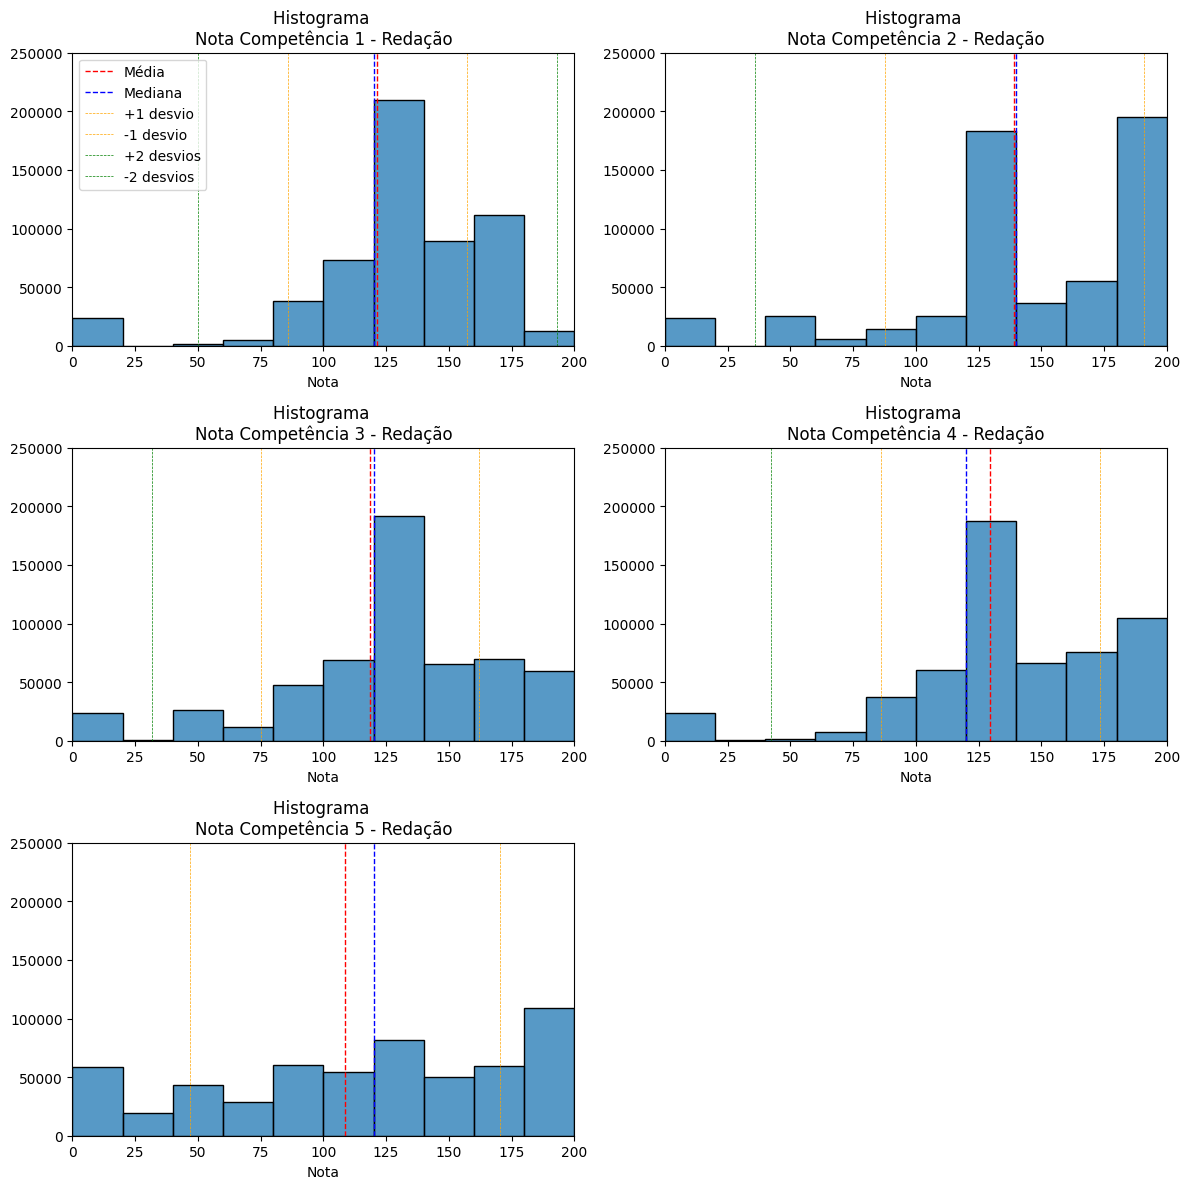

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
colunas = ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
titulos = ['Nota Competência 1 - Redação',
           'Nota Competência 2 - Redação',
           'Nota Competência 3 - Redação',
           'Nota Competência 4 - Redação',
           'Nota Competência 5 - Redação']

for ax, col, tit in zip(axes.flatten(), colunas, titulos):
    sns.histplot(df[col], bins=10, ax=ax)

    media = df[col].mean()
    std = df[col].std()
    mediana = df[col].median()

    ax.axvline(media, color='red', linestyle='--', linewidth=1.0, label='Média')
    ax.axvline(mediana, color='blue', linestyle='--', linewidth=1.0, label='Mediana')
    ax.axvline(media + std, color='orange', linestyle='--', linewidth=0.5, label='+1 desvio')
    ax.axvline(media - std, color='orange', linestyle='--', linewidth=0.5, label='-1 desvio')
    ax.axvline(media + 2*std, color='green', linestyle='--', linewidth=0.5, label='+2 desvios')
    ax.axvline(media - 2*std, color='green', linestyle='--', linewidth=0.5, label='-2 desvios')

    ax.set_title(f'Histograma \n{tit}', fontsize=12)
    ax.set_xlabel('Nota')
    ax.set_ylabel('')
    ax.set_xlim(0, 200) 
    ax.set_ylim(0, 250000)
  
    if col == colunas[0]:
        ax.legend()

# Remove o sexto subplot vazio (última célula da grade 2x3)
if len(colunas) < len(axes.flatten()):
    for ax in axes.flatten()[len(colunas):]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

Com intuito de categorizar as variáveis numéricas notas (área de conhecimento e competencia da prova de redação) foram definidas 3 faixas tomando como base a mediana das notas:
- 1: Candidato tirou zero
- 2: Candidato tirou uma nota abaixo da mediana
- 3: Candidato tirou uma nota acima da mediana  

## 3. Data Preparation

Aqui é feito o tratamento completo, que foi explicado passo a passo acima

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

# Configurações
DATA_PATH = Path().resolve() / 'data'
ARQUIVO_AMOSTRA_PATH = DATA_PATH / 'raw' / 'microdados_enem_2023_sample.csv'

# Definição dos tipos
colunas_float = [
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
    'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
    'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'
]

colunas_string = [
    'NU_INSCRICAO', 'CO_MUNICIPIO_ESC', 'CO_MUNICIPIO_PROVA'
]

# Captura os nomes das colunas
colunas = pd.read_csv(ARQUIVO_AMOSTRA_PATH, nrows=0, encoding='latin1').columns.tolist()

# Preparar o dicionário de tipos
dtypes = {}
for col in colunas:
    if col in colunas_float:
        dtypes[col] = 'float32'
    elif col in colunas_string:
        dtypes[col] = 'string'
    else:
        dtypes[col] = 'category'

# Leitura com tipos otimizados
df = pd.read_csv(ARQUIVO_AMOSTRA_PATH, dtype=dtypes, encoding='latin1')

# REGIAO
# Define regioes...
df['REGIAO'] = df['CO_MUNICIPIO_PROVA'].apply(lambda x: x[0])
df['REGIAO'] = df['REGIAO'].astype('category')

#... e aglutina
condicoes = [
    (df['REGIAO'].isin(['1', '5'])),                 # N e C-O
    (df['REGIAO'].isin(['3', '4'])),                 # S e SE
    (df['REGIAO'].isin(['2'])),                     # NE
]

# Valores que serão atribuídos com base nas condições
valores = [1, 2, 3]

df['REGIAO'] =  np.select(condicoes, valores)
df['REGIAO'] = df['REGIAO'].astype('category')

df['REGIAO'] = df['REGIAO'].cat.rename_categories({
    '1.0': '1',
    '2.0': '2',
    '3.0': '3'
})

# Exclusoes
del df['NU_INSCRICAO']
del df['TP_FAIXA_ETARIA']
del df['CO_MUNICIPIO_ESC']                         
del df['TP_DEPENDENCIA_ADM_ESC']                   
del df['TP_LOCALIZACAO_ESC']                       
del df['TP_SIT_FUNC_ESC']
del df['TP_ENSINO']
del df['CO_MUNICIPIO_PROVA']

# TP_CONCLUSAO
condicoes = [
    (df['TP_ST_CONCLUSAO'] == '1'),                 # Concluido independente do
    (df['TP_ST_CONCLUSAO'].isin(['2', '3'])),       # Cursando EM
    (df['TP_ST_CONCLUSAO'] == '4')                  # EM não cursado
]

# Valores que serão atribuídos com base nas condições
valores = [1, 2, 3]

df['TP_CONCLUSAO'] =  np.select(condicoes, valores)
df['TP_CONCLUSAO'] = df['TP_CONCLUSAO'].astype('category')

df['TP_CONCLUSAO'] = df['TP_CONCLUSAO'].cat.rename_categories({
    '1.0': '1',
    '2.0': '2',
    '3.0': '3'
})

del df['TP_ANO_CONCLUIU']
del df['TP_ST_CONCLUSAO'] 

# TP_PRESENCA_DIA1 e TP_PRESENCA_DIA2
df.rename(columns={
    'TP_PRESENCA_CH': 'TP_PRESENCA_DIA1',
    'TP_PRESENCA_CN': 'TP_PRESENCA_DIA2'
}, inplace=True)

del df['TP_PRESENCA_LC']
del df['TP_PRESENCA_MT']

# CO_PROVA_DIA1
condicoes = [
    df['CO_PROVA_CH'].isin(['1191.0', '1192.0', '1193.0', '1194.0']),               # Prova Comum
    df['CO_PROVA_CH'].isin(['1195.0', '1196.0', '1197.0', '1198.0', '1199.0']),     # Prova Adaptada
    df['CO_PROVA_CH'].isin(['1271.0', '1272.0', '1273.0', '1274.0']),               # Prova Reaplicação
    df['CO_PROVA_CH'].isna()                                                        # Ausente
]

# Valores que serão atribuídos com base nas condições
valores = [1, 2, 3, 4]

df['CO_PROVA_DIA1'] =  np.select(condicoes, valores)
df['CO_PROVA_DIA1'] = df['CO_PROVA_DIA1'].astype('category')
del df['CO_PROVA_CH']
del df['CO_PROVA_LC'] 

# CO_PROVA_DIA2
condicoes = [
    df['CO_PROVA_CN'].isin(['1221.0', '1222.0', '1223.0', '1224.0']),               # Prova Comum
    df['CO_PROVA_CN'].isin(['1225.0', '1226.0', '1227.0', '1228.0', '1229.0']),     # Prova Adaptada
    df['CO_PROVA_CN'].isin(['1301.0', '1302.0', '1303.0', '1304.0']),               # Prova Reaplicação
    df['CO_PROVA_CN'].isna()                                            # Ausente
]

# Valores que serão atribuídos com base nas condições
valores = [1, 2, 3, 4]

df['CO_PROVA_DIA2'] = np.select(condicoes, valores)
df['CO_PROVA_DIA2'] = df['CO_PROVA_DIA2'].astype('category')
del df['CO_PROVA_CN']
del df['CO_PROVA_MT'] 

# ESC_MAE, ESC_PAI, INTERNET
df.rename(columns={
    'Q001': 'ESC_PAI',
    'Q002': 'ESC_MAE',
    'Q025': 'INTERNET'
}, inplace=True)

# ESC_PAI
condicoes = [
    df['ESC_PAI'].isin(['A']),                         # Nunca estudou
    df['ESC_PAI'].isin(['B', 'C', 'D']),               # Não tem EM completo
    df['ESC_PAI'].isin(['E', 'F', 'G']),               # Tem EM completo
    df['ESC_PAI'].isin(['H'])                         # Não sei
]

valores = [1, 2, 3, 4]

df['ESC_PAI'] =  np.select(condicoes, valores)
df['ESC_PAI'] = df['ESC_PAI'].astype('category')

# ESC_MAE
condicoes = [
    df['ESC_MAE'].isin(['A']),                         # Nunca estudou
    df['ESC_MAE'].isin(['B', 'C', 'D']),               # Não tem EM completo
    df['ESC_MAE'].isin(['E', 'F', 'G']),               # Tem EM completo
    df['ESC_MAE'].isin(['H'])                           # Não sei
]

valores = [1, 2, 3, 4]

df['ESC_MAE'] =  np.select(condicoes, valores)
df['ESC_MAE'] = df['ESC_MAE'].astype('category')

# RENDA
condicoes = [
    df['Q006'] == 'A',                  # Sem renda                    
    df['Q006'].isin(['B', 'C']),        # Renda até 1.5 SM
    (~df['Q006'].isin(['A', 'B', 'C']))   # Renda maior que 1.5 SM
]

valores = [1, 2, 3]

df['RENDA'] = np.select(condicoes, valores)
df['RENDA'] = df['RENDA'].astype(int).astype('category')

del df['Q006']

# TP_STATUS_REDACAO
condicoes = [
    df['TP_STATUS_REDACAO'] == '1.0',
    df['TP_STATUS_REDACAO'] == '2.0',
    df['TP_STATUS_REDACAO'] == '3.0',
    df['TP_STATUS_REDACAO'] == '4.0',
    df['TP_STATUS_REDACAO'] == '6.0',
    df['TP_STATUS_REDACAO'] == '7.0',
    df['TP_STATUS_REDACAO'] == '8.0',
    df['TP_STATUS_REDACAO'] == '9.0',
    df['TP_STATUS_REDACAO'].isna(),
]

valores = [1, 2, 3, 4, 6, 7, 8, 9, 10]

df['TP_STATUS_REDACAO'] =  np.select(condicoes, valores)
df['TP_STATUS_REDACAO'] = df['TP_STATUS_REDACAO'].astype('category')

# VARIÁVEIS NUMÉRICAS
# Transformacao das variaveis numericas em categoricas, segunda as faixas estipuladas
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',  'NU_NOTA_REDACAO',
           'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']

for col in colunas:
    mediana = df[col].median()
    std = df[col].std()

    condicoes = [
        df[col].isna(),
        df[col] == 0,
        df[col] <= mediana,
        df[col] > mediana
    ]

    valores = [0, 1, 2, 3]

    df[col] =  np.select(condicoes, valores)
    df[col] = df[col].astype('category')

# # Proporcao das faixas das notas
# print("\n:")

# colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
#            'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
# contagens = {}
# percentual = {}

# for col in colunas:
    
#     contagens[f'tp_{col}'] = df[col].value_counts(dropna=False)
#     percentual[f'tp_{col}_pct'] = df[col].value_counts(normalize=True, dropna=False) * 100

#     resultado = pd.DataFrame({
#         'Frequência': contagens[f'tp_{col}'],
#         'Percentual (%)': percentual[f'tp_{col}_pct'].round(2)
#     })
    
#     print(resultado, '\n')

# Exclusoes mais novas
del df['TP_NACIONALIDADE']
del df['TP_ESTADO_CIVIL']
del df['CO_PROVA_DIA1']
del df['CO_PROVA_DIA2']
del df['TP_STATUS_REDACAO']

## 4. Modeling

### Checa significâncias

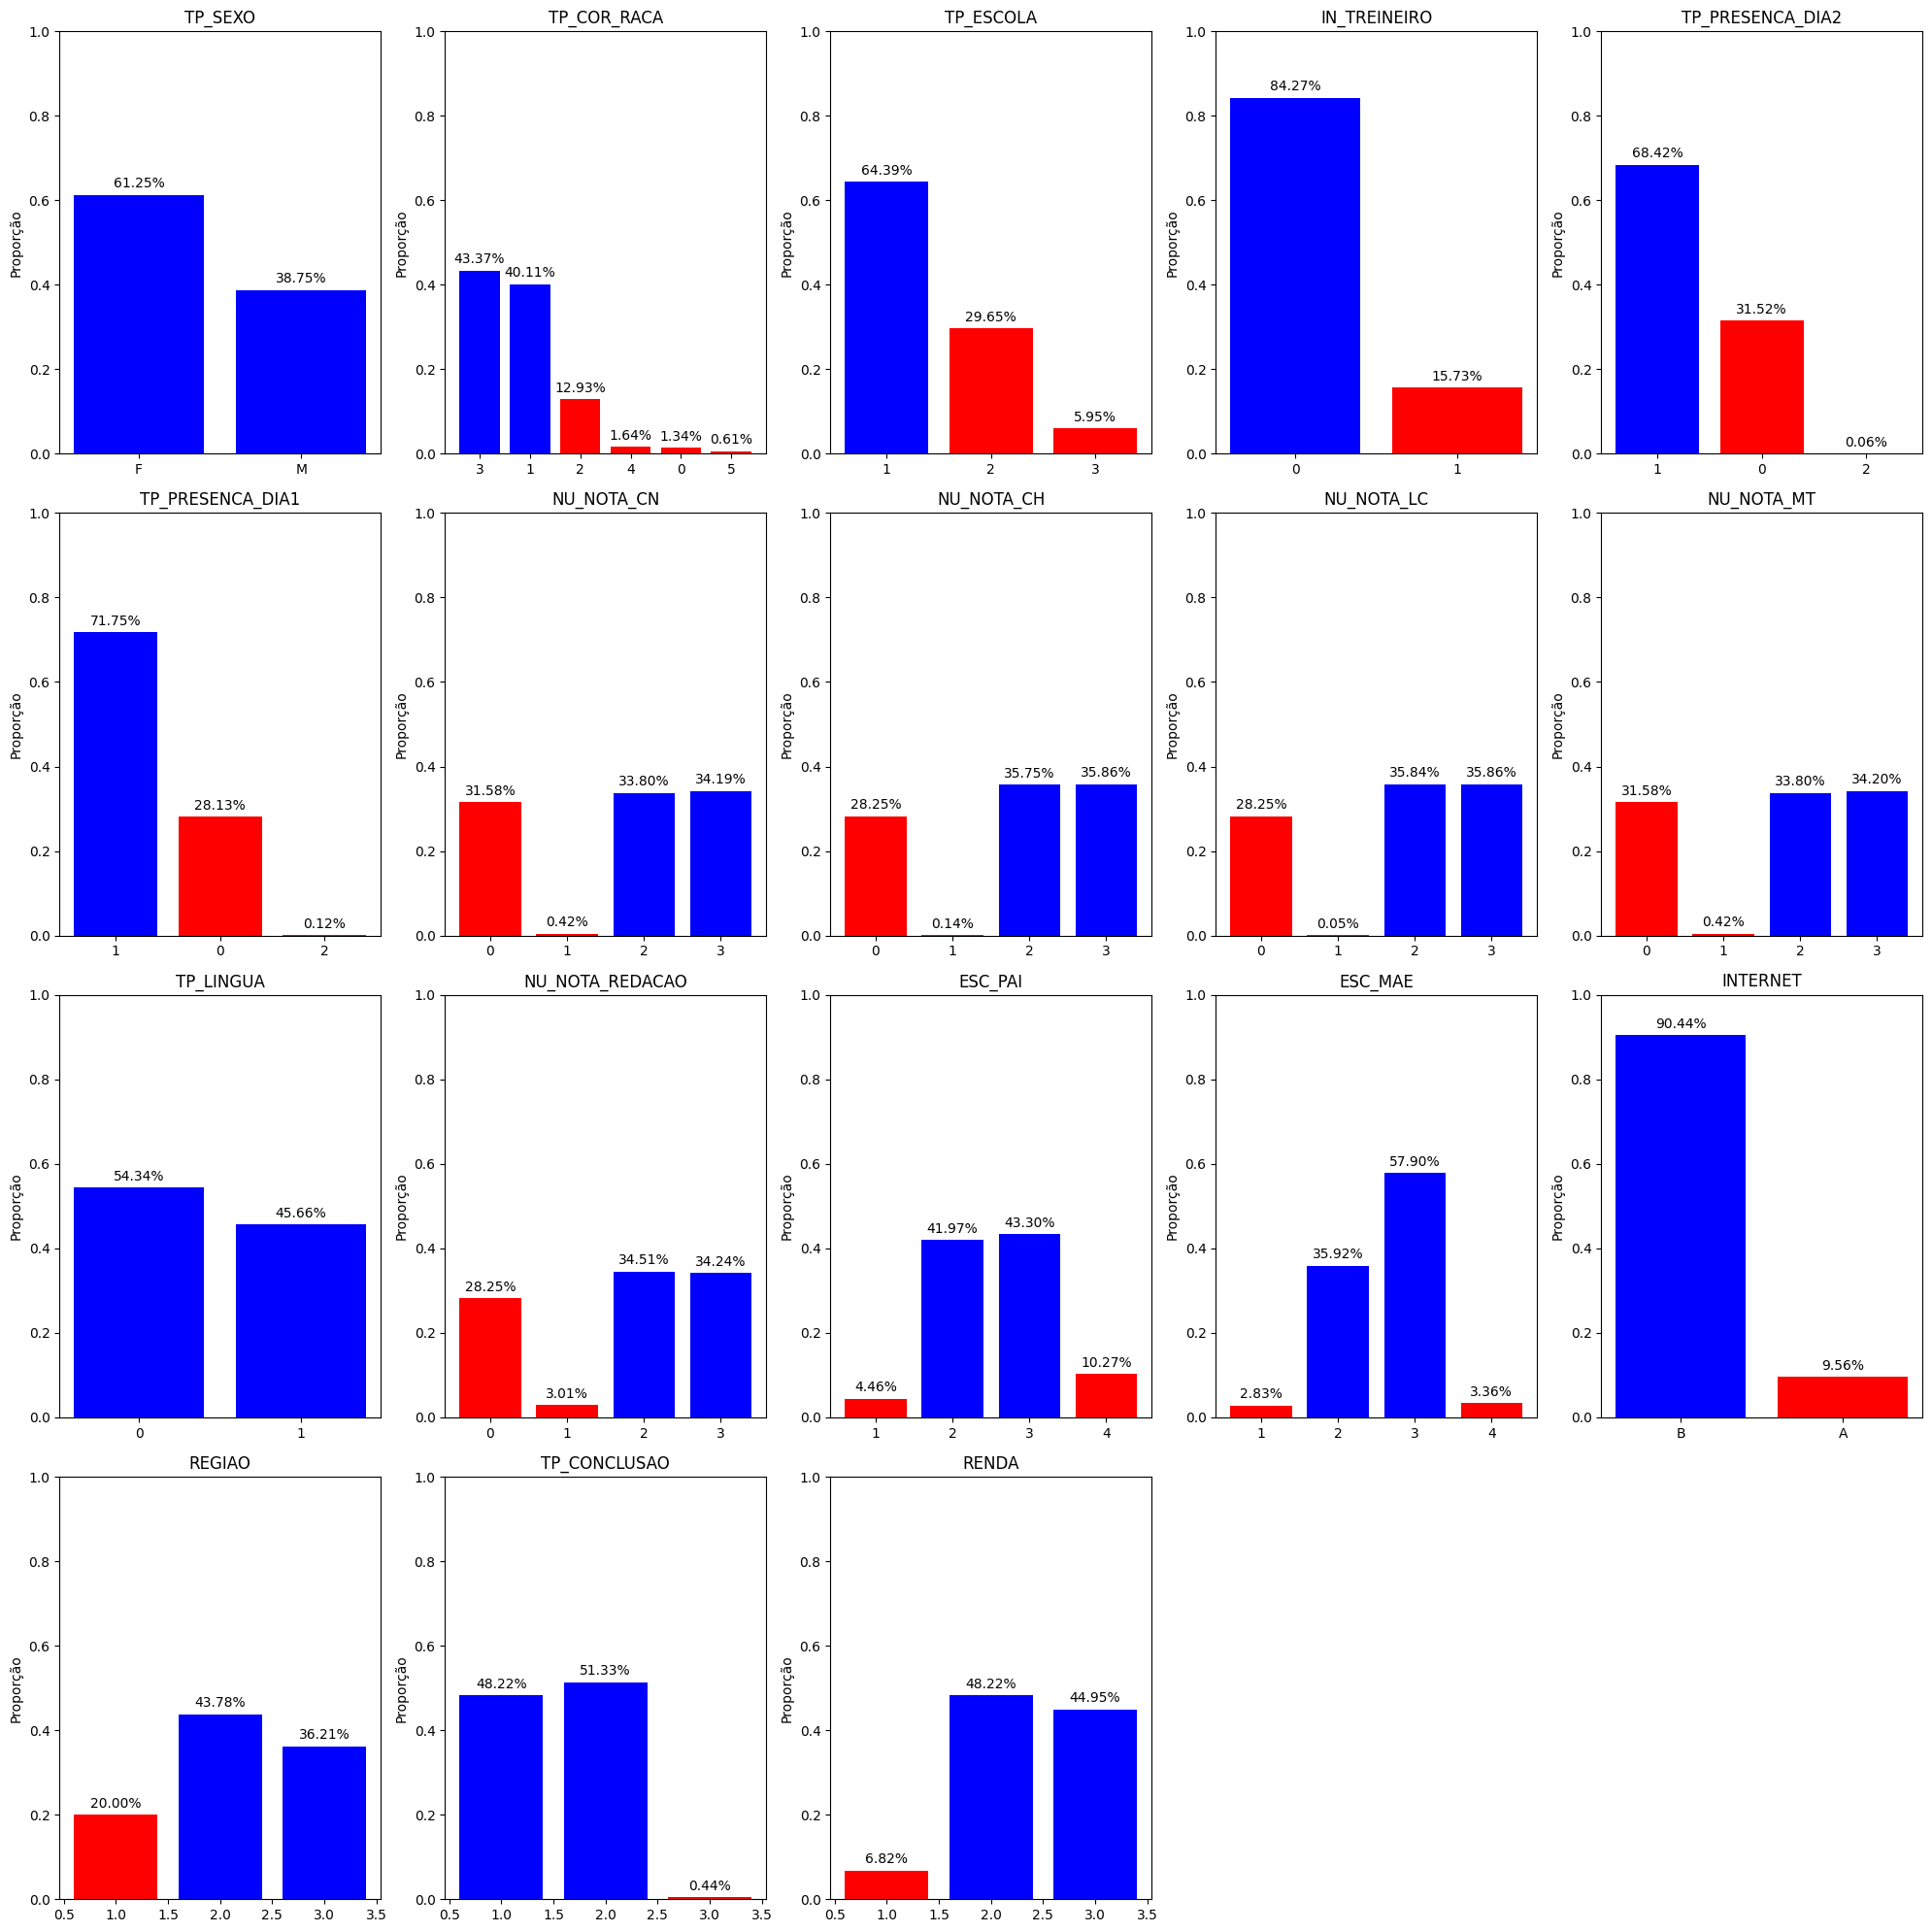

In [3]:
from utils import plot_barras_categoricas

desconsidera_cols = ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
plot_barras_categoricas(df.drop(columns=desconsidera_cols), min_sup=0.33)

As colunas `NU_NOTA_COMP1`, `NU_NOTA_COMP2`, `NU_NOTA_COMP3`, `NU_NOTA_COMP4`, `NU_NOTA_COMP5` foram descartadas do banco binário, pois elas aumentam muito o número de itens frequententes, que por sua vez, aumentam o número de regras (essa análise foi feita anteriormente, o que embasou a decisão de omití-las). Outra razão seria que a nota final da redação é uma boa medida resumo da soma das notas individuas das competências da redação.

### Analisando apenas quem foi os dois dias

Para focar a análise e encontrar padrões relevantes, decidimos observar apenas candidatos que foram nos dois dias de prova.

Total anterior:	 786791
Total novo:	 535555


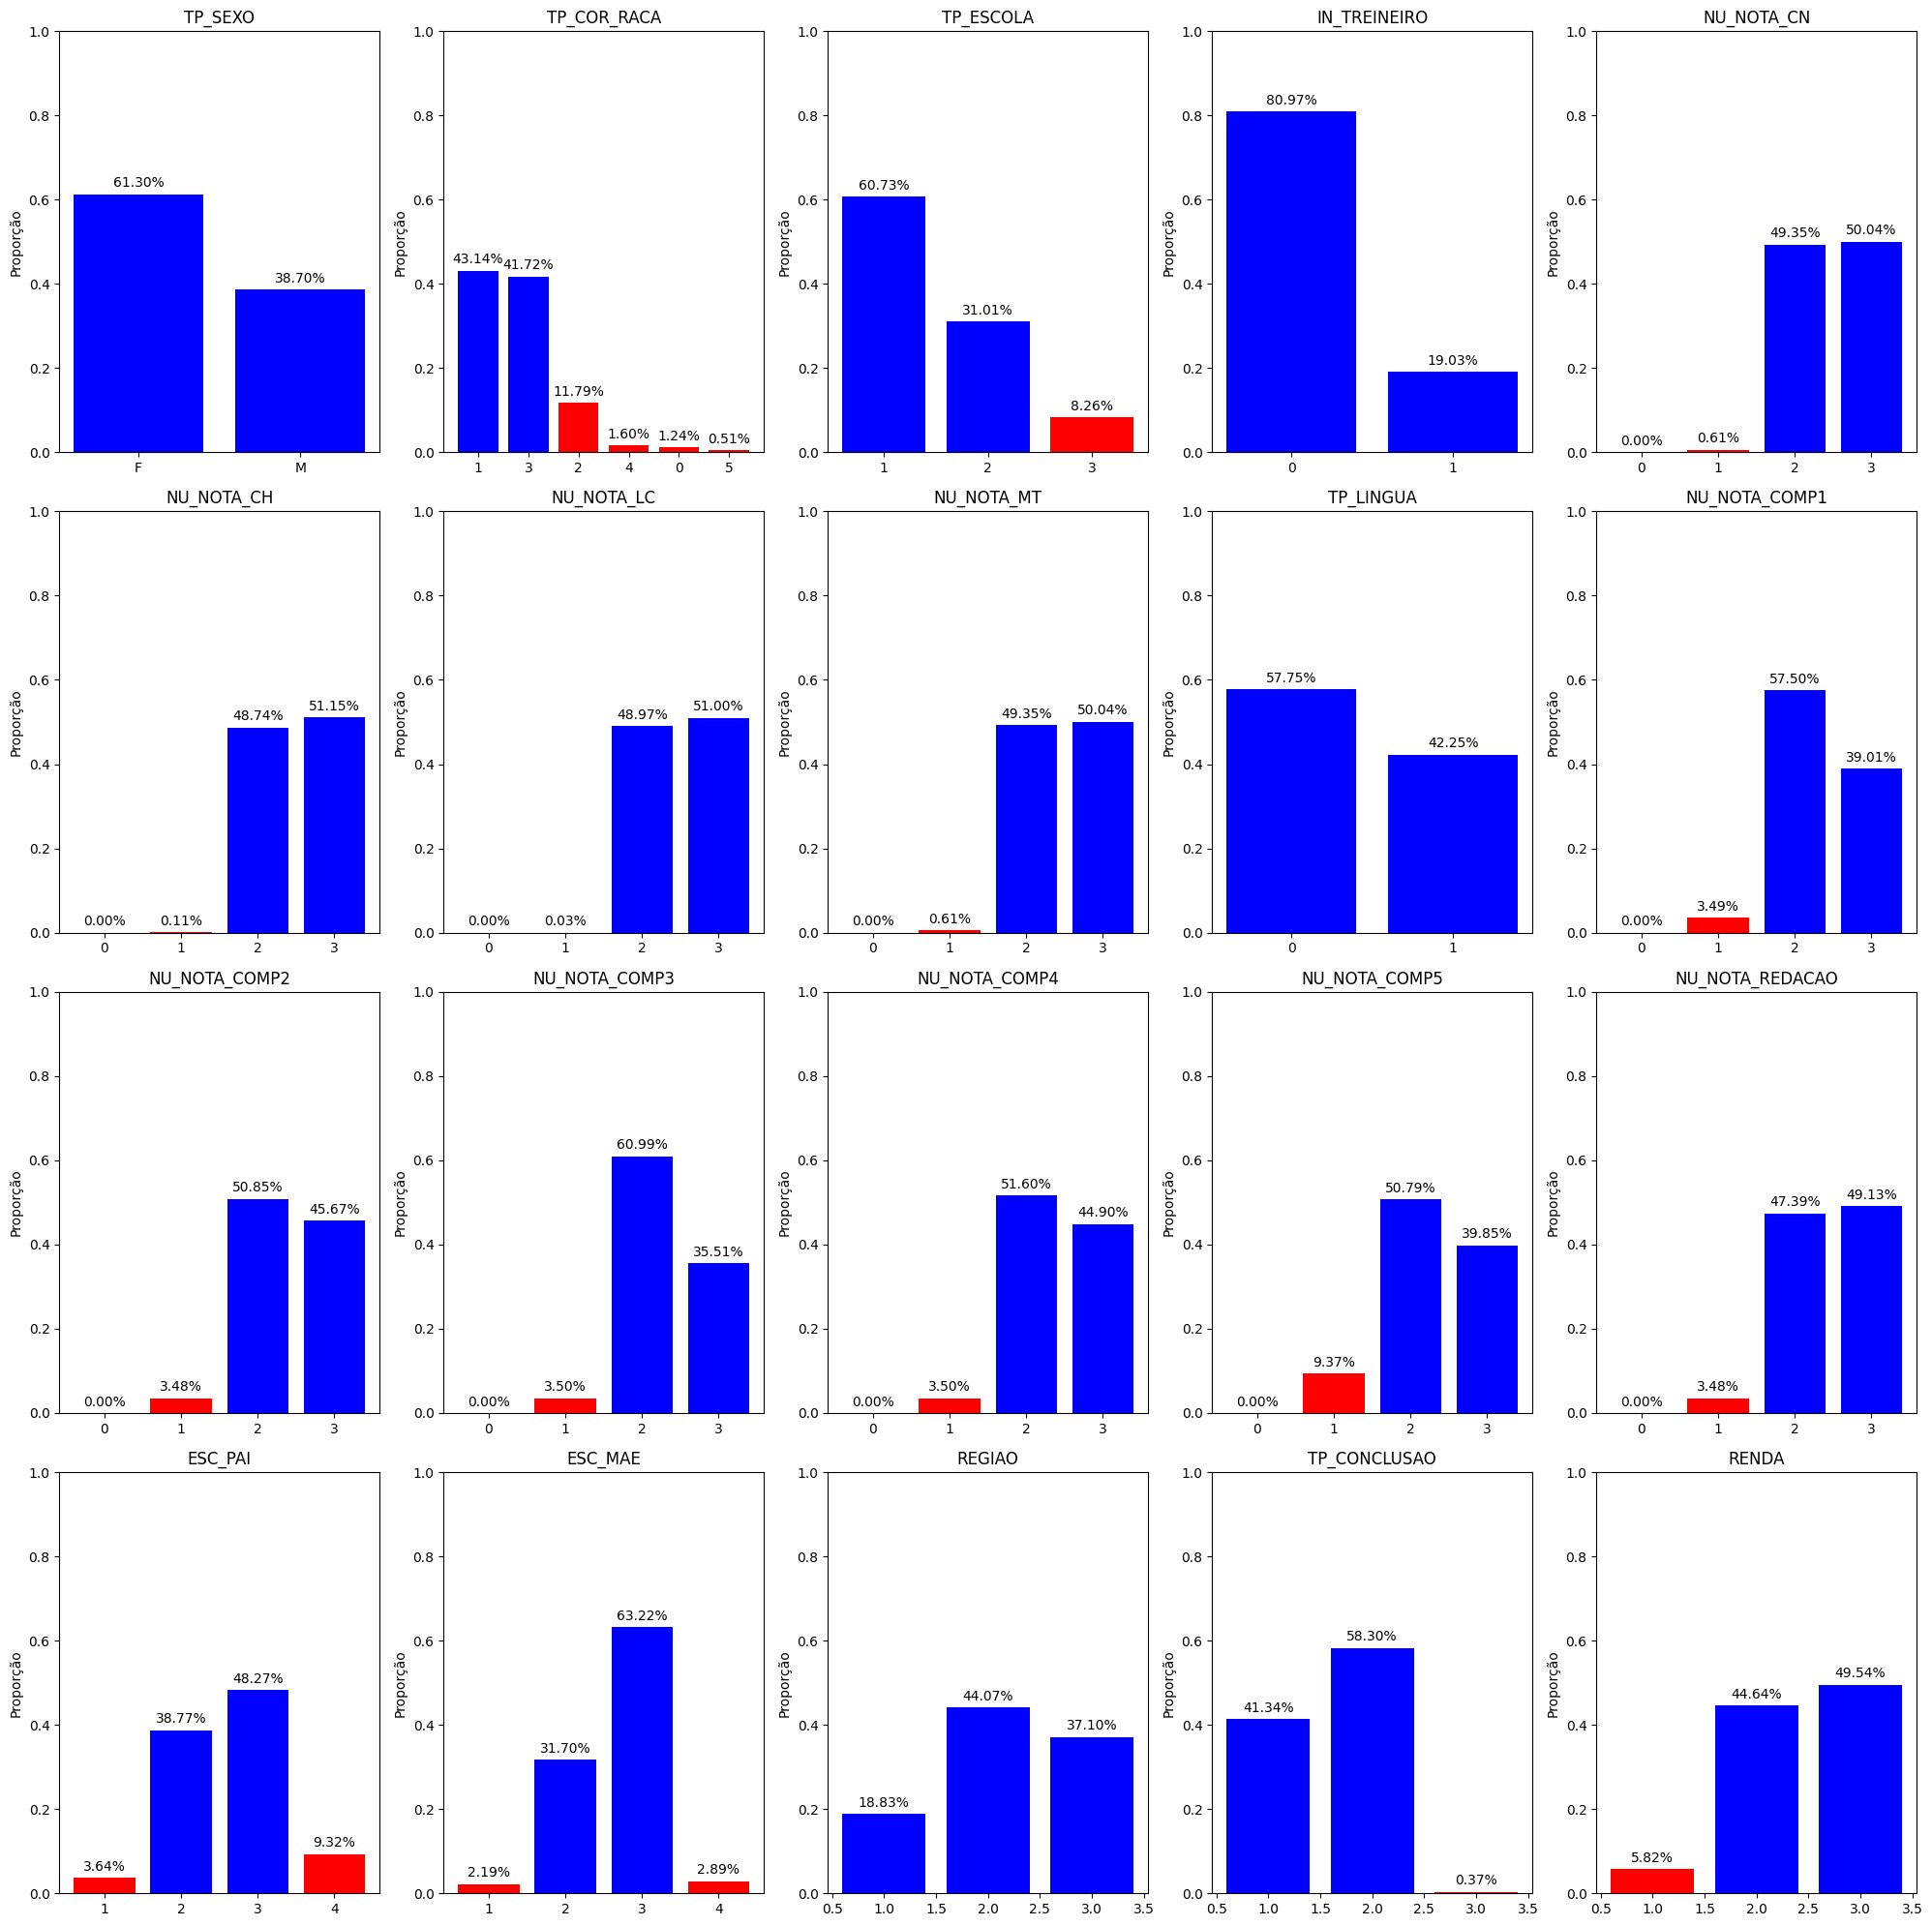

In [4]:
from utils import plot_barras_categoricas

cols_drop = ['TP_PRESENCA_DIA2', 'TP_PRESENCA_DIA1', 'INTERNET']

df_apenas_presentes = df[(df.TP_PRESENCA_DIA1 == '1') & (df.TP_PRESENCA_DIA2 == '1')].copy()
df_apenas_presentes.drop(columns=cols_drop, inplace=True)
print(f'Total anterior:\t {len(df)}')
print(f'Total novo:\t {len(df_apenas_presentes)}')

plot_barras_categoricas(df_apenas_presentes, min_sup=0.18)

O gráfico acima serve de auxílio para decidir qual o suporte mínimo que será introduzido como parâmetro. Como é observado, a maior parte dos valores frequentes para cada variável está acima de 18%. Por esse motivo, 0.18 será o valor escolhido para suporte do algorítimo FP-Growth. 

Abaixo, segue o código que executa o algorítimo PG-Growth.

In [ ]:
# from mlxtend.frequent_patterns import apriori, fpgrowth
# from mlxtend.frequent_patterns import association_rules
# import time

# df_binario = pd.get_dummies(df_apenas_presentes, prefix_sep='_', dtype=bool)

# # 1. Gerar itemsets frequentes usando FP-Growth
# print('Gerando itemsets...')

# start_time = time.time()
# frequent_itemsets = fpgrowth(df_binario, min_support=0.18, use_colnames=True)
# end_time = time.time()
# print(f"\tTempo de execução: {end_time - start_time} segundos")

# # Exporta pra csv
# RESULTS_PATH = Path().resolve()
# frequent_itemsets.to_csv(RESULTS_PATH / 'results' / 'freq_itemsets_presentes_08.csv')

Gerando itemsets...
	Tempo de execução: 6318.434493303299 segundos


In [11]:
import re
import ast

RESULTS_PATH = Path().resolve()
presentes = pd.read_csv(RESULTS_PATH / 'results' / 'freq_itemsets_presentes_08.csv')

if 'Unnamed: 0' in presentes.columns:
    presentes = presentes.drop(columns=['Unnamed: 0'])

presentes['itemsets'] = presentes['itemsets'].apply(
    lambda x: frozenset(ast.literal_eval(re.sub(r'^frozenset\((.*)\)$', r'\1', x)))
)

print(f'Padrões Frequentes: \t {len(presentes)} \n')
presentes.head()

Padrões Frequentes: 	 5097 



,support,itemsets
0,0.809685,(IN_TREINEIRO_0)
1,0.632243,(ESC_MAE_3)
2,0.613026,(TP_SEXO_F)
3,0.609870,(NU_NOTA_COMP3_2)
4,0.582967,(TP_CONCLUSAO_2)


Foram encontrados 5.097 padrões frequentes. Na seção seguinte, será feito o tratamento dos padrões frequentes para chegar as regras.

In [12]:
import re
import ast

RESULTS_PATH = Path().resolve()
presentes = pd.read_csv(RESULTS_PATH / 'results' / 'freq_itemsets_presentes_08.csv')

if 'Unnamed: 0' in presentes.columns:
    presentes = presentes.drop(columns=['Unnamed: 0'])

presentes['itemsets'] = presentes['itemsets'].apply(
    lambda x: frozenset(ast.literal_eval(re.sub(r'^frozenset\((.*)\)$', r'\1', x)))
)

In [14]:
def get_maximal_itemsets(frequent_itemsets):
    sets = frequent_itemsets.to_dict(orient='records')
    maximal_sets = []

    for i, current in enumerate(sets):
        itemset_i = current['itemsets']
        is_subset = False
        for j, other in enumerate(sets):
            if i != j and itemset_i < other['itemsets']:
                is_subset = True
                break
        if not is_subset:
            maximal_sets.append(current)

    return pd.DataFrame(maximal_sets)

Abaixo, segue o conjunto dos maximais. A ideia será trabalhar com os maximais ao invés dos itemsets frequentes, por motivos de evitar redundência e focar nos padrões mais informativos.

In [25]:
# Calcula os conjuntos maximais
maximais = get_maximal_itemsets(presentes)
print(f'Total de itemsets maximais: {len(maximais)}')

display(maximais)

Total de itemsets maximais: 1292


,support,itemsets
0,0.188296,(REGIAO_1)
1,0.284636,"(ESC_MAE_3, TP_SEXO_F, IN_TREINEIRO_0)"
2,0.191357,"(ESC_MAE_3, NU_NOTA_COMP3_2, TP_SEXO_F)"
3,0.254715,"(ESC_MAE_3, TP_CONCLUSAO_2, IN_TREINEIRO_0)"
4,0.240142,"(ESC_MAE_3, TP_SEXO_F, TP_CONCLUSAO_2)"
...,...,...
1287,0.180721,"(TP_SEXO_M, NU_NOTA_COMP3_2, NU_NOTA_REDACAO_2, NU_NOTA_COMP4_2)"
1288,0.184579,"(TP_SEXO_M, NU_NOTA_COMP3_2, NU_NOTA_COMP1_2, NU_NOTA_REDACAO_2)"
1289,0.184510,"(TP_SEXO_M, NU_NOTA_COMP3_2, NU_NOTA_COMP1_2, IN_TREINEIRO_0)"
1290,0.200794,"(TP_SEXO_M, ESC_MAE_3, IN_TREINEIRO_0)"


Abaixo, filtramos apenas os itemsets maximais que têm mais de um item, pois apenas esses podem ser utilizados para gerar regras de associação com partes distintas de antecedente e consequente.

In [26]:
maximais_2plus = maximais[maximais.itemsets.apply(len) > 1]
print(f'Itemsets maximais que podem virar regras: {len(maximais_2plus)}')

display(maximais_2plus)

Itemsets maximais que podem virar regras: 1291


,support,itemsets
1,0.284636,"(ESC_MAE_3, TP_SEXO_F, IN_TREINEIRO_0)"
2,0.191357,"(ESC_MAE_3, NU_NOTA_COMP3_2, TP_SEXO_F)"
3,0.254715,"(ESC_MAE_3, TP_CONCLUSAO_2, IN_TREINEIRO_0)"
4,0.240142,"(ESC_MAE_3, TP_SEXO_F, TP_CONCLUSAO_2)"
5,0.219613,"(ESC_MAE_3, NU_NOTA_COMP3_2, TP_CONCLUSAO_2)"
...,...,...
1287,0.180721,"(TP_SEXO_M, NU_NOTA_COMP3_2, NU_NOTA_REDACAO_2, NU_NOTA_COMP4_2)"
1288,0.184579,"(TP_SEXO_M, NU_NOTA_COMP3_2, NU_NOTA_COMP1_2, NU_NOTA_REDACAO_2)"
1289,0.184510,"(TP_SEXO_M, NU_NOTA_COMP3_2, NU_NOTA_COMP1_2, IN_TREINEIRO_0)"
1290,0.200794,"(TP_SEXO_M, ESC_MAE_3, IN_TREINEIRO_0)"


In [28]:
maximais_2plus.drop_duplicates(subset='itemsets')

print(f'Itemsets maximais que podem virar regras: {len(maximais_2plus)}')

Itemsets maximais que podem virar regras: 1291


Criamos uma função que calcula, para um determinado itemset, as seguintes estatísticas a partir de um conjunto de regras de associação (all_rules):   

- qtd_regras: número de regras em que os antecedentes e consequentes estão contidos no itemset.   
- lift_min: valor mínimo do lift dessas regras.   
- lift_medio: valor médio do lift.   
- n_itens: número de itens no itemset.   

A verificação x != itemset evita que a regra seja do tipo "X → X", que não é desejado (redundante).

In [29]:
from mlxtend.frequent_patterns import association_rules

def calc_lift_stats_de_um_itemset(itemset, all_rules):
    itemset = frozenset(itemset)

    # Seleciona regras com antecedente e consequente contidos no itemset
    regras_do_itemset = all_rules[
        all_rules['antecedents'].apply(lambda x: x.issubset(itemset) and x != itemset) &
        all_rules['consequents'].apply(lambda x: x.issubset(itemset) and x != frozenset())
    ]

    if not regras_do_itemset.empty:
        lift_min = regras_do_itemset['lift'].min()
        lift_media = regras_do_itemset['lift'].mean()
        qtd_regras = len(regras_do_itemset)
    else:
        lift_min = None
        lift_media = None
        qtd_regras = 0

    return {
        'n_itens': len(itemset),
        'qtd_regras': qtd_regras,
        'lift_min': lift_min,
        'lift_medio': lift_media
    }

Abaixo, o intuito é, para cada itemset maximal com mais de um item, calcular:   
- Quantidade de itens no conjunto;    
- Quantidade de regras geradas com aquele conjunto;    
- Lift mínimo e   
- Lift médio.   

In [ ]:
print("Calculando regras... ")
all_rules = association_rules(presentes, metric="support", min_threshold=0)

maximais_2plus = maximais[maximais.itemsets.apply(len) > 1].copy()

maximais_2plus[['n_itens', 'qtd_regras', 'lift_min', 'lift_medio']] = (
    maximais_2plus['itemsets']
    .apply(lambda x: pd.Series(calc_lift_stats_de_um_itemset(x, all_rules)))
)

Calculando regras... 


In [33]:
pd.set_option('display.max_colwidth', None)
itemsets_produtivos = maximais_2plus[maximais_2plus.lift_min > 1].sort_values(by='lift_min', ascending=False)
print(f'Padrões produtivos: {len(itemsets_produtivos)}')

print(itemsets_produtivos['qtd_regras'].sum())
itemsets_produtivos.head(20)

Padrões produtivos: 680
178676.0


,support,itemsets,n_itens,qtd_regras,lift_min,lift_medio
1174,0.180200,"(NU_NOTA_LC_3, NU_NOTA_COMP3_3, NU_NOTA_MT_3, NU_NOTA_CH_3, NU_NOTA_COMP1_3)",5.0,180.0,1.409198,1.938475
1199,0.180080,"(NU_NOTA_LC_3, NU_NOTA_COMP3_3, NU_NOTA_CN_3, NU_NOTA_MT_3, NU_NOTA_CH_3)",5.0,180.0,1.408833,1.775409
683,0.198934,"(RENDA_2, ESC_MAE_2)",2.0,2.0,1.405892,1.405892
1150,0.188985,"(NU_NOTA_COMP3_3, NU_NOTA_COMP5_3, NU_NOTA_COMP4_3, NU_NOTA_MT_3, NU_NOTA_COMP1_3, NU_NOTA_COMP2_3, NU_NOTA_REDACAO_3)",7.0,1932.0,1.358557,2.320919
1065,0.184989,"(NU_NOTA_COMP5_3, NU_NOTA_COMP4_3, NU_NOTA_MT_3, NU_NOTA_CH_3, NU_NOTA_COMP1_3, NU_NOTA_REDACAO_3)",6.0,602.0,1.339302,2.076500
1158,0.188623,"(NU_NOTA_COMP3_3, NU_NOTA_COMP4_3, NU_NOTA_MT_3, NU_NOTA_CH_3, NU_NOTA_COMP1_3, NU_NOTA_REDACAO_3)",6.0,602.0,1.339302,2.148840
1161,0.185901,"(NU_NOTA_COMP3_3, NU_NOTA_COMP5_3, NU_NOTA_COMP4_3, NU_NOTA_MT_3, NU_NOTA_CH_3, NU_NOTA_REDACAO_3)",6.0,602.0,1.339302,2.122571
1160,0.187135,"(NU_NOTA_COMP3_3, NU_NOTA_COMP5_3, NU_NOTA_COMP4_3, NU_NOTA_CH_3, NU_NOTA_COMP1_3, NU_NOTA_COMP2_3, NU_NOTA_REDACAO_3)",7.0,1932.0,1.333425,2.312305
1159,0.184452,"(NU_NOTA_COMP3_3, NU_NOTA_MT_3, NU_NOTA_CH_3, NU_NOTA_COMP1_3, NU_NOTA_COMP2_3, NU_NOTA_REDACAO_3)",6.0,602.0,1.333425,2.128190
1157,0.194167,"(NU_NOTA_COMP3_3, NU_NOTA_COMP4_3, NU_NOTA_MT_3, NU_NOTA_CH_3, NU_NOTA_COMP2_3, NU_NOTA_REDACAO_3)",6.0,602.0,1.333425,2.076959


Resolvemos tirar as colunas notas por competência da redação, já explicado o motivo no início da seção. Também, tiramos o tipo de escola (privado, público e não informado), pois a maioria se enquadrava em não informado e não trazia informação relevante nas regras. Além disso, aumentava o número de regras.

In [35]:
# Considerando apenas os itemsets que nao tem a nota final da redação
itemsets_produtivos_sem_red = itemsets_produtivos[~itemsets_produtivos.itemsets.apply(
    lambda x: bool({'NU_NOTA_COMP1_2', 'NU_NOTA_COMP1_3',
                    'NU_NOTA_COMP2_2', 'NU_NOTA_COMP2_3',
                    'NU_NOTA_COMP3_2', 'NU_NOTA_COMP3_3',
                    'NU_NOTA_COMP4_2', 'NU_NOTA_COMP4_3',
                    'NU_NOTA_COMP5_2', 'NU_NOTA_COMP5_3',  
                    'TP_ESCOLA_1'} & x)
)]

print(f'Padrões produtivos sem a redação e o TP_ESCOLA_1: {len(itemsets_produtivos_sem_red)}')
display(itemsets_produtivos_sem_red.head(20))

Padrões produtivos sem a redação e o TP_ESCOLA_1: 189


,support,itemsets,n_itens,qtd_regras,lift_min,lift_medio
683,0.198934,"(RENDA_2, ESC_MAE_2)",2.0,2.0,1.405892,1.405892
456,0.198592,"(RENDA_3, REGIAO_2, TP_COR_RACA_1)",3.0,12.0,1.327213,1.455685
682,0.202646,"(NU_NOTA_MT_2, ESC_MAE_2)",2.0,2.0,1.295595,1.295595
603,0.185682,"(NU_NOTA_CH_2, NU_NOTA_LC_2, NU_NOTA_MT_2, TP_LINGUA_1)",4.0,50.0,1.279661,1.598277
488,0.196346,"(REGIAO_3, TP_COR_RACA_3)",2.0,2.0,1.268615,1.268615
394,0.194105,"(RENDA_2, NU_NOTA_LC_2, NU_NOTA_MT_2, NU_NOTA_CH_2)",4.0,50.0,1.262799,1.592410
684,0.195935,"(NU_NOTA_LC_2, ESC_MAE_2)",2.0,2.0,1.262281,1.262281
396,0.190266,"(RENDA_2, NU_NOTA_LC_2, NU_NOTA_CN_2, NU_NOTA_CH_2)",4.0,50.0,1.260238,1.582405
388,0.183968,"(RENDA_2, NU_NOTA_LC_2, NU_NOTA_CN_2, NU_NOTA_MT_2)",4.0,50.0,1.260238,1.553174
397,0.184394,"(RENDA_2, NU_NOTA_CN_2, NU_NOTA_MT_2, NU_NOTA_CH_2)",4.0,50.0,1.260238,1.556849


Selecionando alguns padrões interessantes pra analisar mais a fundo

In [36]:
def get_conf_rules_from_itemset(itemsets, itemset_id, all_rules, confidence_threshold = 0.7, lift_threshold = 1.1):
    itemset = itemsets.loc[itemset_id]
    itemset = frozenset(itemset.itemsets)

    # Seleciona regras com antecedente e consequente contidos no itemset
    regras_do_itemset = all_rules[
        all_rules['antecedents'].apply(lambda x: x.issubset(itemset) and x != itemset) &
        all_rules['consequents'].apply(lambda x: x.issubset(itemset) and x != frozenset())
    ]

    regras_do_itemset = regras_do_itemset[(regras_do_itemset['confidence'] >= confidence_threshold) & (regras_do_itemset['lift'] >= lift_threshold)]

    return regras_do_itemset

In [47]:
resultados = []

for idx, row in itemsets_produtivos_sem_red.iterrows():
    regras = get_conf_rules_from_itemset(itemsets_produtivos_sem_red, idx, all_rules, 0.7)
    if not regras.empty:
        resultados.append(regras)

conf_rules_from_prod_isets = pd.concat(resultados, ignore_index=True)

In [48]:
cols = ['antecedents',	'consequents','antecedent support',	'consequent support', 'support', 'confidence', 	'lift',	'leverage']

print(f'Regras confiantes: {len(conf_rules_from_prod_isets)}')
conf_rules_export = conf_rules_from_prod_isets[cols].sort_values(by=['leverage'], ascending=True).drop_duplicates(subset=['antecedents', 'consequents'])
print(f'Regras confiantes depois: {len(conf_rules_export)}')

Regras confiantes: 3833
Regras confiantes depois: 1582


## 5. Evaluation

A seguir estão as regras que procuramos dentre um conjunto total de 1582 regras.

Procuramos enteder quais itemsets implicam no:
- Desempenho da nota (nota baixa e nota alta);   
- Categoria da renda (baixa e alta);   

Também procuramos entender os itemsets implicados pela região.   

Foi considerado nota alta aqueles alunas que ficaram acima da mediana. O raciocínio é o mesmo para nota baixa.   

Foi considerado renda alta acima de 1.5 salários mínimos. O raciocínio é o mesmo para renda baixa.   

### Nota boa no 1º dia (Ciência Humanas e Linguagens e Redação)

In [51]:
from IPython.display import display, HTML

def display_scrollable_df(df, max_height='300px', max_width='100%'):
    styles = f'''
    <div style="
        overflow: auto; 
        max-height: {max_height}; 
        max-width: {max_width}; 
        border: 1px solid #ccc;
        font-size: 14px;
    ">
        {df.to_html(index=False)}
    </div>
    '''
    display(HTML(styles))

In [52]:
subset = frozenset(['NU_NOTA_CH_3', 'NU_NOTA_LC_3'])
nota_boa_mt = conf_rules_export[
    (conf_rules_export['consequents'] == subset )
     & (conf_rules_export['antecedents'].apply(len) > 2)
].sort_values(by=['lift', 'confidence'], ascending=[False, False])

display(f'Numero de regras {len(nota_boa_mt)}')
display_scrollable_df(nota_boa_mt)

'Numero de regras 24'

antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
"(NU_NOTA_CN_3, ESC_MAE_3, NU_NOTA_MT_3, NU_NOTA_REDACAO_3)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.219300,0.414144,0.182807,0.833593,2.012809,0.091985
"(NU_NOTA_CN_3, ESC_MAE_3, NU_NOTA_MT_3, TP_LINGUA_0)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.222629,0.414144,0.182381,0.819215,1.978091,0.090180
"(NU_NOTA_CN_3, NU_NOTA_MT_3, NU_NOTA_REDACAO_3)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.269143,0.414144,0.220267,0.818400,1.976123,0.108803
"(RENDA_3, NU_NOTA_CN_3, ESC_MAE_3, NU_NOTA_MT_3)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.224048,0.414144,0.182874,0.816226,1.970875,0.090086
"(RENDA_3, NU_NOTA_CN_3, NU_NOTA_MT_3)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.262154,0.414144,0.211366,0.806265,1.946822,0.102796
"(RENDA_3, NU_NOTA_CN_3, NU_NOTA_REDACAO_3)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.227011,0.414144,0.182842,0.805432,1.944810,0.088827
"(NU_NOTA_CN_3, NU_NOTA_MT_3, ESC_PAI_3)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.237505,0.414144,0.190991,0.804154,1.941725,0.092629
"(NU_NOTA_CN_3, NU_NOTA_MT_3, TP_LINGUA_0)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.271955,0.414144,0.218558,0.803655,1.940521,0.105930
"(NU_NOTA_CN_3, TP_LINGUA_0, NU_NOTA_REDACAO_3)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.236407,0.414144,0.188528,0.797471,1.925588,0.090621
"(NU_NOTA_CN_3, ESC_MAE_3, NU_NOTA_MT_3)","(NU_NOTA_LC_3, NU_NOTA_CH_3)",0.286310,0.414144,0.226963,0.792715,1.914105,0.108389


### Nota boa no 2º dia (Ciência da Natureza e Matemática)

In [53]:
subset = frozenset(['NU_NOTA_MT_3', 'NU_NOTA_CN_3'])
nota_boa_mt = conf_rules_export[
    (conf_rules_export['consequents'] == subset )
     & (conf_rules_export['antecedents'].apply(len) > 2)
].sort_values(by=['lift', 'confidence'], ascending=[False, False])

display(f'Numero de regras {len(nota_boa_mt)}')
display_scrollable_df(nota_boa_mt)

'Numero de regras 21'

antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
"(NU_NOTA_LC_3, ESC_MAE_3, NU_NOTA_REDACAO_3, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.233589,0.367878,0.182807,0.782598,2.127329,0.096874
"(NU_NOTA_LC_3, ESC_MAE_3, RENDA_3, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.235057,0.367878,0.182874,0.777998,2.114824,0.096401
"(RENDA_3, NU_NOTA_REDACAO_3, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.235460,0.367878,0.182683,0.775856,2.109003,0.096063
"(NU_NOTA_LC_3, RENDA_3, NU_NOTA_REDACAO_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.234938,0.367878,0.180002,0.766170,2.082672,0.093574
"(NU_NOTA_LC_3, ESC_MAE_3, TP_LINGUA_0, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.239415,0.367878,0.182381,0.761777,2.070731,0.094305
"(NU_NOTA_LC_3, RENDA_3, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.278700,0.367878,0.211366,0.758400,2.061552,0.108838
"(NU_NOTA_LC_3, NU_NOTA_REDACAO_3, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.292825,0.367878,0.220267,0.752213,2.044733,0.112543
"(NU_NOTA_REDACAO_3, TP_LINGUA_0, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.248460,0.367878,0.185731,0.747528,2.031997,0.094328
"(NU_NOTA_LC_3, ESC_PAI_3, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.255671,0.367878,0.190991,0.747017,2.030609,0.096935
"(RENDA_3, TP_LINGUA_0, NU_NOTA_CH_3)","(NU_NOTA_CN_3, NU_NOTA_MT_3)",0.249799,0.367878,0.186248,0.745592,2.026735,0.094352


### Região como antecendente

In [54]:
subset = frozenset(['REGIAO_2'])
nota_boa_mt = conf_rules_export[
    conf_rules_export['consequents'].apply(lambda x: x.issubset(subset))
].sort_values(by=['lift', 'confidence'], ascending=[False, False])

display(f'Numero de regras {len(nota_boa_mt)}')
display_scrollable_df(nota_boa_mt)

'Numero de regras 1'

antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
"(RENDA_3, TP_COR_RACA_1)",(REGIAO_2),0.283635,0.44072,0.198592,0.700169,1.588691,0.073589


### Renda como consequente

In [55]:
subset = frozenset(['RENDA_3'])
nota_boa_mt = conf_rules_export[
    conf_rules_export['consequents'].apply(lambda x: x.issubset(subset))
     & (conf_rules_export['antecedents'].apply(len) > 2)
].sort_values(by=['lift', 'confidence'], ascending=[False, False])

display(f'Numero de regras {len(nota_boa_mt)}')
display_scrollable_df(nota_boa_mt)

'Numero de regras 86'

antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
"(ESC_MAE_3, NU_NOTA_MT_3, TP_LINGUA_0, ESC_PAI_3)",(RENDA_3),0.214202,0.495413,0.182383,0.851452,1.718670,0.076264
"(NU_NOTA_CN_3, ESC_MAE_3, NU_NOTA_MT_3, ESC_PAI_3)",(RENDA_3),0.215916,0.495413,0.181851,0.842228,1.700051,0.074883
"(ESC_PAI_3, ESC_MAE_3, NU_NOTA_MT_3, NU_NOTA_CH_3)",(RENDA_3),0.220745,0.495413,0.185032,0.838218,1.691958,0.075672
"(NU_NOTA_LC_3, ESC_MAE_3, NU_NOTA_MT_3, ESC_PAI_3)",(RENDA_3),0.220095,0.495413,0.184483,0.838199,1.691919,0.075445
"(NU_NOTA_MT_3, TP_LINGUA_0, ESC_PAI_3)",(RENDA_3),0.234338,0.495413,0.195050,0.832344,1.680101,0.078956
"(ESC_MAE_3, REGIAO_2, ESC_PAI_3)",(RENDA_3),0.218469,0.495413,0.181544,0.830986,1.677359,0.073312
"(NU_NOTA_CN_3, TP_LINGUA_0, ESC_PAI_3)",(RENDA_3),0.224532,0.495413,0.184847,0.823258,1.661761,0.073612
"(ESC_MAE_3, TP_COR_RACA_1, ESC_PAI_3)",(RENDA_3),0.231138,0.495413,0.190081,0.822372,1.659973,0.075573
"(NU_NOTA_CN_3, NU_NOTA_MT_3, ESC_PAI_3)",(RENDA_3),0.237505,0.495413,0.195149,0.821662,1.658540,0.077486
"(NU_NOTA_CN_3, ESC_MAE_3, NU_NOTA_MT_3, TP_LINGUA_0)",(RENDA_3),0.222629,0.495413,0.182889,0.821496,1.658204,0.072596


### Renda como antecedente (renda alta)

In [56]:
# agora como antecedente
subset = frozenset(['RENDA_3'])
nota_boa_mt = conf_rules_export[
    conf_rules_export['antecedents'].apply(lambda x: x.issubset(subset))
    #  & (conf_rules_export['antecedents'].apply(len) > 2)
].sort_values(by=['lift', 'confidence'], ascending=[False, False])

display(f'Numero de regras {len(nota_boa_mt)}')
display_scrollable_df(nota_boa_mt)

'Numero de regras 2'

antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
(RENDA_3),(ESC_MAE_3),0.495413,0.632243,0.395375,0.798071,1.262285,0.082153
(RENDA_3),(TP_LINGUA_0),0.495413,0.577506,0.348614,0.703683,1.218488,0.062510


### Nota baixa em Ciência Humanas

In [58]:
subset = frozenset(['NU_NOTA_CH_2', 'NU_NOTA_LC_2'])
nota_boa_mt = conf_rules_export[
    (conf_rules_export['consequents'] == subset )
    #  & (conf_rules_export['antecedents'].apply(len) > 2)
].sort_values(by=['lift', 'confidence'], ascending=[False, False])

display(f'Numero de regras {len(nota_boa_mt)}')
display_scrollable_df(nota_boa_mt)

'Numero de regras 2'

antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
"(NU_NOTA_MT_2, NU_NOTA_CN_2)","(NU_NOTA_CH_2, NU_NOTA_LC_2)",0.360969,0.391594,0.264880,0.733803,1.873888,0.123527
"(NU_NOTA_MT_2, TP_SEXO_F, NU_NOTA_CN_2)","(NU_NOTA_CH_2, NU_NOTA_LC_2)",0.255359,0.391594,0.183524,0.718688,1.835289,0.083526


### Nota baixa em Redação 

In [59]:
subset = frozenset(['NU_NOTA_REDACAO_2'])
nota_boa_mt = conf_rules_export[
    (conf_rules_export['consequents'] == subset )
    #  & (conf_rules_export['antecedents'].apply(len) > 2)
].sort_values(by=['lift', 'confidence'], ascending=[False, False])

display(f'Numero de regras {len(nota_boa_mt)}')
display_scrollable_df(nota_boa_mt)

'Numero de regras 0'

antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage


### Avaliação do algorítmo e Considerações Finais

Foi utilizado somente o algorítmo FP-Growth. Para um suporte mínimo de 0.05 (sugerido pela LLM) o algorítmo ficou rodando por mais de 24 horas e ainda não tinha finalizado. Isso indica que o algorítmo é sensível para uma explosão combinatória (o banco possui muitas linhas- aproximadamento 0.8 milhões - e muitas categorias - 93 colunas.)

Diante dessas limitações, resolvemos alglutinar ainda mais as categorias de algumas variáveis (isso já havia sido feita anteriormente). Também, fazer uma breve análise descritiva dos dados para aumentar o suporte. A LLM falhou em definir um suporte mínimo, uma vez que ela não tinha acesso aos dados e era incapaz de fazer essa análise.

Ao definirmos um novo suporte para 0.18 e feito as aglutinações e exclusão de algumas colunas, o algorítmo foi bem mais rápido e rodou em aproximadamente 1,45 horas.

Esse número mágico de 0.18 não foi tão mágico, já que analisamos a frequência de cada categoria das features e definimos um limite mínimo de frequencia onde a maioria das categorias atendiam.